In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_theme()
pd.set_option('display.max_columns', None)

## 1. Data Reading and Summary

##### Find out what tables we have in the database

In [2]:
con = sqlite3.connect("data/failure.db")
cur = con.cursor()
res = cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")
res.fetchall()

[('failure',)]

#### \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*

##### Read the data in as pandas DataFrame

In [113]:
ds_fl = pd.read_sql_query("SELECT * from failure", con)
con.close()
ds_fl

,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E
0,137b948a-c99f-4afa-a2a7-9ef65ae51e8f,"Model 5, 2022",Blue,110.3 °C,1551,"Shang Hai, China",Medium,659.7,Normal,0,0,0,0,0
1,3395a182-7e76-4fb3-94ba-5163d8f4e6b0,"Model 3, 2022",Black,110.4 °C,1408,"Shang Hai, China",Medium,705.3,Premium,1,0,0,0,0
2,8c6a8e5b-d869-4665-b739-819c9e4a2070,"Model 3, 2022",Grey,110.3 °C,1498,"Shang Hai, China",Low,670.7,Premium,0,0,0,0,0
3,ff864366-fe5e-409e-9b2f-8fe440d8cc5b,"Model 3, 2022",Black,110.4 °C,1433,"Berlin, Germany",High,630.6,Premium,1,0,0,0,0
4,10484506-1be0-4a86-8dbc-b8b2092b93b2,"Model 3, 2022",White,230.7 °C,1408,"New York, U.S",High,660.9,Normal,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10076,64921ab7-c024-447a-8651-006a7e8a5e64,"Model 5, 2020",White,110.6 °C,1575,"Shang Hai, China",Low,728.5,Premium,0,0,0,0,0
10077,246aa846-094d-441a-814a-ecf64d4e3775,"Model 5, 2020",White,110.6 °C,1750,"Berlin, Germany",Low,698.9,Premium,0,0,0,0,0
10078,0b9c5542-e343-4b7e-a4c9-aad358dbe993,"Model 3, 2019",White,110.6 °C,1529,"Shang Hai, China",Low,651.5,Normal,0,0,0,0,0
10079,fd5ac6de-3afb-4ad8-b4a9-4bc47b34dd08,"Model 3, 2019",Blue,110.6 °C,1523,"Berlin, Germany",High,638.8,Premium,0,0,0,0,0


#### \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*

##### Data summary

In [4]:
display(ds_fl.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10081 entries, 0 to 10080
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car ID            10081 non-null  object 
 1   Model             10081 non-null  object 
 2   Color             10081 non-null  object 
 3   Temperature       10081 non-null  object 
 4   RPM               10081 non-null  int64  
 5   Factory           10081 non-null  object 
 6   Usage             10081 non-null  object 
 7   Fuel consumption  10081 non-null  float64
 8   Membership        9697 non-null   object 
 9   Failure A         10081 non-null  int64  
 10  Failure B         10081 non-null  int64  
 11  Failure C         10081 non-null  int64  
 12  Failure D         10081 non-null  int64  
 13  Failure E         10081 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


None

In [5]:
ds_fl.describe()

,RPM,Fuel consumption,Failure A,Failure B,Failure C,Failure D,Failure E
count,10081.000000,10081.000000,10081.000000,10081.000000,10081.000000,10081.000000,10081.000000
mean,1470.626823,679.472304,0.025692,0.018550,0.031049,0.024502,0.026386
std,487.502419,58.486101,0.158222,0.134935,0.173457,0.154608,0.160289
min,-2636.000000,598.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1418.000000,638.800000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1499.000000,668.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1609.000000,704.200000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2886.000000,904.800000,1.000000,1.000000,1.000000,1.000000,1.000000


#### \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*

##### List out the unique values of key attributes

In [6]:
ds_nunique = ds_fl.nunique()
for col in ds_nunique[(ds_nunique > 2) & (ds_nunique < 50)].index:
    print(col, ds_nunique[col], "\n", ds_fl[col].unique(), "\n", "-"*40)

Model 41 
 ['Model 5, 2022' 'Model 3, 2022' 'Model 5, 2021' 'Model 3, 2021'
 'Model 7, 2021' 'Model 5, 2020' 'Model 3, 2020' 'Model 7, 2020'
 'Model 5, 2019' 'Model 7, 2019' 'Model 3, 2019' 'Model 5, 2018'
 'Model 3, 2018' 'Model 7, 2018' 'Model 3, 2017' 'Model 5, 2017'
 'Model 7, 2017' 'Model 3, 2016' 'Model 5, 2016' 'Model 7, 2016'
 'Model 3, 2015' 'Model 7, 2015' 'Model 5, 2015' 'Model 3, 2014'
 'Model 5, 2014' 'Model 3, 2013' 'Model 5, 2013' 'Model 7, 2013'
 'Model 3, 2012' 'Model 5, 2012' 'Model 7, 2022' 'Model 7, 2014'
 'Model 7, 2012' 'Model 5, 2011' 'Model 3, 2011' 'Model 7, 2011'
 'Model 3, 2010' 'Model 7, 2010' 'Model 5, 2010' 'Model 3, 2009'
 'Model 5, 2009'] 
 ----------------------------------------
Color 5 
 ['Blue' 'Black' 'Grey' 'White' 'Red'] 
 ----------------------------------------
Factory 6 
 ['Shang Hai, China' 'Berlin, Germany' 'New York, U.S' 'Seng Kang, China'
 'Newton, China' 'Bedok, Germany'] 
 ----------------------------------------
Usage 3 
 ['Medium' 'Low

#### \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*

##### Find out if there is attribute with any missing value.

In [36]:
ds_fl.isnull().sum()

Car ID                0
Model                 0
Color                 0
Temperature           0
RPM                   0
Factory               0
Usage                 0
Fuel consumption      0
Membership          384
Failure A             0
Failure B             0
Failure C             0
Failure D             0
Failure E             0
dtype: int64

##### There are much more enties with "None" Membership than the 384 that was detected by isnull method. It turns out that there are string "None" and NoneType "None" in the membership attribute. 

##### Naturally, we can guess that the NoneType "None" means missing Membership information while string "None" means really no more membership. We'll confirm this in later data wrangling and cleaning section.

In [4]:
print(f'{len(ds_fl[ds_fl["Membership"].isnull()])} cars with \
{type(ds_fl[ds_fl["Membership"].isnull()].Membership.values[0])} type of Membership.')
ds_fl[ds_fl["Membership"].isnull()].sample(5)

384 cars with <class 'NoneType'> type of Membership.


,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E
4153,62707da4-d239-4341-8f96-7ab5d9a9aa2b,"Model 5, 2018",Black,115.1 °C,1212,"Shang Hai, China",Medium,703.9,None,0,0,1,0,0
8784,b2fc1440-5833-42e7-8026-b609f16cff21,"Model 3, 2020",Red,110.2 °C,1437,"Shang Hai, China",High,672.6,None,0,0,0,0,1
8725,e9085a39-3522-414d-a207-e91aa29cca70,"Model 5, 2018",White,230.3 °F,1515,"Newton, China",Medium,710.5,None,1,0,0,0,0
4475,90a55b50-8785-4b2b-a7ba-ad64263dcb10,"Model 3, 2022",Red,118.2 °C,1351,"Shang Hai, China",Low,715.6,None,0,0,1,0,0
5418,df67931a-295d-42b7-9c28-6a4d76ee769d,"Model 3, 2020",White,117.7 °C,1398,"Shang Hai, China",High,605.3,None,0,0,1,0,0


In [5]:
print(f'{len(ds_fl[ds_fl["Membership"] == "None"])} cars with \
{type(ds_fl[ds_fl["Membership"] == "None"].Membership.values[0])} type of Membership.')
ds_fl[ds_fl["Membership"] == "None"].sample(5)

1734 cars with <class 'str'> type of Membership.


,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E
4435,378cdb3a-0e88-45f8-8d38-3cfa1330d7fc,"Model 3, 2015",Blue,116.2 °C,1321,"Shang Hai, China",High,604.0,None,0,0,1,0,0
7678,5eaf065e-c3a1-4cba-abd1-fdd7582cf13c,"Model 5, 2012",White,111.9 °C,1389,"Shang Hai, China",High,689.7,None,0,0,0,0,0
8327,ab7bee49-1fad-44e9-a0ea-5685f83a7d4b,"Model 5, 2016",Red,110.5 °C,1254,"Shang Hai, China",Low,690.6,None,0,0,0,0,0
2383,58743c07-a105-4079-af71-036b12a20c14,"Model 3, 2016",White,110.7 °C,1568,"Shang Hai, China",Low,641.7,None,0,0,0,0,0
882,ef0addde-5f86-4fff-98aa-23100b4060ea,"Model 5, 2017",White,110.1 °C,1739,"Shang Hai, China",Low,687.6,None,0,0,0,0,0


##### Extract the car model and year from the Model attribute

##### The year tells us that the cars with NoneType "None" membership are all 2018 or newer. So it very likely the membership information is missing. They should be with either "Normal" or "Premium" membership.

In [114]:
ds_fl["M_class"] = (ds_fl["Model"].str.split(", ", expand=True)[0]).astype('category').cat.as_ordered()
ds_fl["M_year"] = ds_fl["Model"].str.split(", ", expand=True)[1].astype("int")

In [115]:
print("The earliest year of cars with NoneType membership:", 
      ds_fl[ds_fl["Membership"].isnull()].min(numeric_only=True)["M_year"])
print("The latest year of cars with NoneType membership:", 
      ds_fl[ds_fl["Membership"].isnull()].max(numeric_only=True)["M_year"])
print("-"*40)
print(r'The earliest year of cars with string "None" membership:', 
      ds_fl[ds_fl["Membership"] == "None"].min(numeric_only=True)["M_year"])
print(r'The latest year of cars with string "None" membership:', 
      ds_fl[ds_fl["Membership"] == "None"].max(numeric_only=True)["M_year"])

The earliest year of cars with NoneType membership: 2018.0
The latest year of cars with NoneType membership: 2022.0
----------------------------------------
The earliest year of cars with string "None" membership: 2010.0
The latest year of cars with string "None" membership: 2017.0


The Membership attribute of the owners of 1734 cars is string "None" and the newest of them is 2017. Given "Car owners are automatically subscribed with “Normal” membership for the first five years after car purchase", it's reasonable to believe that the Membership for those cars are really None.

384 car owners are with "NoneType" membership. However, all of their cars are within 5 years. Their membership is at least "Normal". It's reasonable to conclude that their membership status is missing.

#### \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*

##### There are 223 entries with negative RPM which doesn't make sense either. 

In [323]:
print(f'{len(ds_fl[ds_fl["RPM"] < 0])} cars with negative RPM.')
ds_fl[ds_fl["RPM"] < 0].sample(5)

223 cars with negative RPM.


,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E,M_class,M_year
9426,834fb79f-cf8e-447c-89d1-11c14e49f68a,"Model 3, 2020",White,230.6 °F,-1341,"New York, U.S",Low,636.9,Premium,0,0,0,0,0,Model 3,2020
7847,cd10b46a-6ed3-4eb2-9aac-4d37edee3f1d,"Model 3, 2011",Black,111.5 °C,-1322,"Shang Hai, China",High,652.4,Normal,0,0,0,0,0,Model 3,2011
7866,851f9e76-0051-41fd-813e-07066aeb3ce3,"Model 3, 2020",White,233.2 °F,-1431,"New York, U.S",Medium,645.4,Premium,0,0,0,0,0,Model 3,2020
2224,d10f42de-6ee2-45e5-a807-3cb4c1c6ff67,"Model 5, 2014",Grey,111.0 °C,-1645,"Berlin, Germany",Low,742.3,Premium,0,0,0,0,0,Model 5,2014
7151,c39d5ab8-5144-477c-adcc-54bc899e6503,"Model 7, 2014",White,111.5 °C,-1906,"Shang Hai, China",Low,822.3,None,0,0,0,0,0,Model 7,2014


# \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*

## 2. Data wrangling and cleaning

#### \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*

##### Overall, there are limited attributes in the data. Five attributes are a bit problematic:

#####      1. "Membership" is missing for 384 entries. All of them are failed ones. They will be filled in later part of this session.
#####      2. "RPM" is negative for 223 enties.
#####      3. Very afew cars are from three factories: 'Seng Kang, China', 'Newton, China', 'Bedok, Germany' . All of them are failed ones.
#####      4. cars from year 2009 and 2010 are very few. 2 are from 2009 and 43 are from 2010. The sample size is too small.
#####      5. The "Temprature" attribute comes with two units: "°C" and "°F". We need to convert all of them to unit "°C".

#### \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*

#### 2.1 Membership

##### There are string "None" entries and NoneType "None" entries in the "Membership" attributes. 

##### The ones with string "None" are probably cars really without membership as they are relatively old and with high failure rate. 

##### However, the cars with NoneType "None" "Membership" are all 2018 and newer.  Accoring to known information, "Car owners are automatically subscribed with “Normal” membership for the first five years after car purchase." Secondly, excluding these cars with NoneType "None" Membership, the cars newer than 2018 (including 2018) are unrealistically low. It's 2.5% while the overall failure rate is 12.6%. It doesn't make sense to conclude that those cars are without any membership. They should either with "Normal" or "Premium" membership. The membership information is just missing.

##### The cars with missing membership is only 384 out of the whole 10081 entries which relatively represents a small portion. However,  they are all with failure. It's 384 out of 1272 failed cars which is quite a substantial portion. We need to fill the Membership, when analyzing the impact on failure from Membership.

##### The histogram plot shows that most of the cars are with membership

[Text(0, 0, '4517'), Text(0, 0, '3446'), Text(0, 0, '1734')]

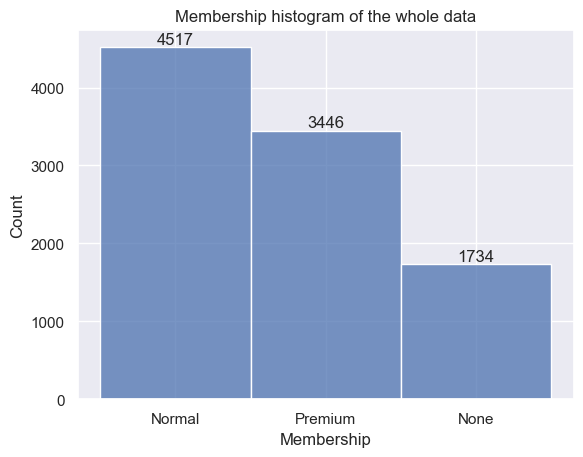

In [308]:
ax = sns.histplot(x="Membership", data=ds_fl, discrete=True)
plt.title("Membership histogram of the whole data")
ax.bar_label(ax.containers[1])

#### \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*

##### Create No_Failure attribute to indicates that whether the car of each entry failed or not by summing the attributes Failure A to E. 

In [116]:
ds_fl["No_Failure"] = (1 - ds_fl.iloc[:,9:14].sum(axis=1)).astype("int")
ds_fl.sample(5)

,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E,M_class,M_year,No_Failure
10056,a4ff673b-846c-4574-bb35-838bb7cbdf8e,"Model 3, 2012",White,110.6 °C,1461,"Shang Hai, China",Medium,635.7,Premium,0,0,0,0,0,Model 3,2012,1
2403,8c2ff0bf-b9a2-46cc-a20a-c6d586b308f1,"Model 7, 2013",Blue,110.7 °C,1448,"Berlin, Germany",Medium,840.0,Normal,0,0,0,0,0,Model 7,2013,1
1145,69f124ec-36a5-4d0b-afa7-6e85c0aa4e8d,"Model 3, 2014",Blue,110.2 °C,1553,"Shang Hai, China",Medium,655.1,Normal,0,0,0,0,0,Model 3,2014,1
5984,13fac320-4d0b-4cd5-827b-c9ccc91597a9,"Model 7, 2012",Black,112.1 °C,1346,"Shang Hai, China",Medium,757.4,Normal,0,0,0,0,0,Model 7,2012,1
6954,351d1a7b-e403-4524-bcbd-2eb425804202,"Model 5, 2018",Red,112.2 °C,1429,"Berlin, Germany",Medium,724.0,Premium,0,0,0,0,0,Model 5,2018,1


#### Create "Failure_type" attribute to categorize the type of failure

In [117]:
ds_fl["Failure_type"] = pd.Categorical( \
            ds_fl.iloc[:,[9, 10, 11, 12, 13, 16]].columns[np.where(ds_fl.iloc[:, [9, 10, 11, 12, 13, 16]] != 0)[1]], \
                                       ["No_Failure", "Failure A", "Failure B", "Failure C", "Failure D", "Failure E"])
ds_fl.sample(5)

,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E,M_class,M_year,No_Failure,Failure_type
8441,612f62c9-8d77-4ddd-8c52-2c470ba813f7,"Model 3, 2022",White,110.5 °C,1630,"Berlin, Germany",Low,641.8,Premium,0,0,0,0,0,Model 3,2022,1,No_Failure
7747,13116b9c-f14b-4dd1-9078-1c3fc392fdeb,"Model 5, 2014",Grey,111.8 °C,1331,"Berlin, Germany",Low,701.7,Premium,0,0,0,0,0,Model 5,2014,1,No_Failure
8036,c3359ff2-86fd-477c-a0cd-d2ac33d5df89,"Model 3, 2021",White,112.1 °C,1460,"Shang Hai, China",Medium,686.6,Normal,0,0,0,0,0,Model 3,2021,1,No_Failure
2968,d1d950c6-fbe6-4774-a1f8-22b39ca49c71,"Model 5, 2018",White,111.9 °C,1312,"Shang Hai, China",High,667.5,Normal,0,0,0,0,0,Model 5,2018,1,No_Failure
5804,9eeaea5d-48cd-41ce-a58f-dd2c50f83ab6,"Model 3, 2013",White,113.6 °C,1365,"Shang Hai, China",Low,659.7,None,0,0,0,0,0,Model 3,2013,1,No_Failure


#### \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*

##### The histogram shows that cars newer than 2018 (inlcuding 2018) are all with valid Membership, either Normal or Premium. And the number of Normal and Premium are largely equal. No dominated value. Even for the failed ones, the ratio of Normal and Premium one is 48:47.

[Text(0, 0, '48'), Text(0, 0, '47')]

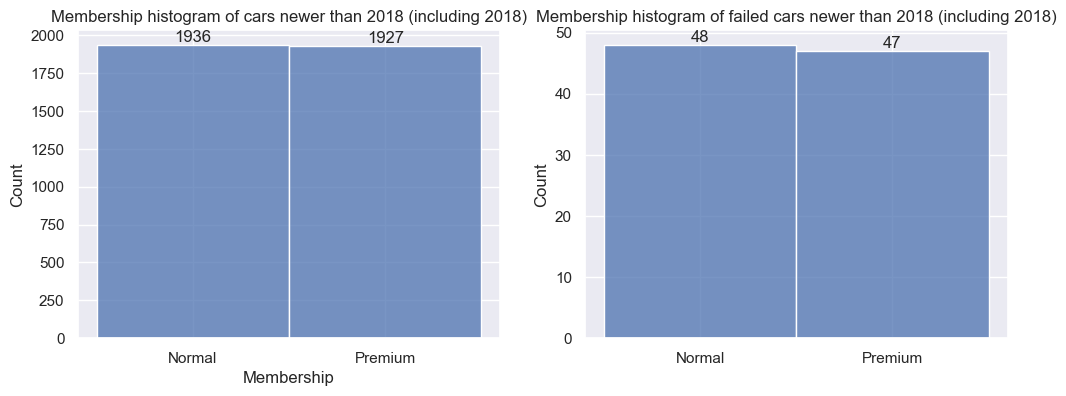

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(x="Membership", data=ds_fl[ds_fl.M_year>2017], discrete=True, ax=axes[0])
axes[0].set_title("Membership histogram of cars newer than 2018 (including 2018)")
axes[0].bar_label(axes[0].containers[1])

sns.histplot(x=pd.Categorical(ds_fl[(ds_fl.M_year>2017) & (ds_fl.No_Failure == 0)]["Membership"], ["Normal", "Premium"]), 
             data=ds_fl[(ds_fl.M_year>2017) & (ds_fl.No_Failure == 0)], discrete=True, ax=axes[1])
axes[1].set_title("Membership histogram of failed cars newer than 2018 (including 2018)")
axes[1].bar_label(axes[1].containers[1])

##### "Normal" and "Premium" are largely equal even within each models. 

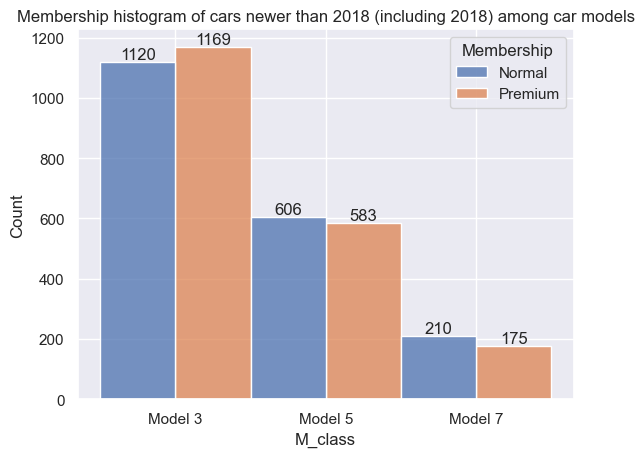

In [55]:
ax = sns.histplot(x="M_class", data=ds_fl[ds_fl.M_year>2017], discrete=True, hue="Membership", multiple="dodge")
plt.title("Membership histogram of cars newer than 2018 (including 2018) among car models")
for bars in ax.containers:
    ax.bar_label(bars)

No obvious trend can be obseved based on the simple EDA. It's hard to fill the missing Membership. Don't use those data with missing Membership first. Let's see if later machine learning part can help or not.

##### Failure rate is relatively small.

[Text(0, 0, '8809'), Text(0, 0, '1272')]

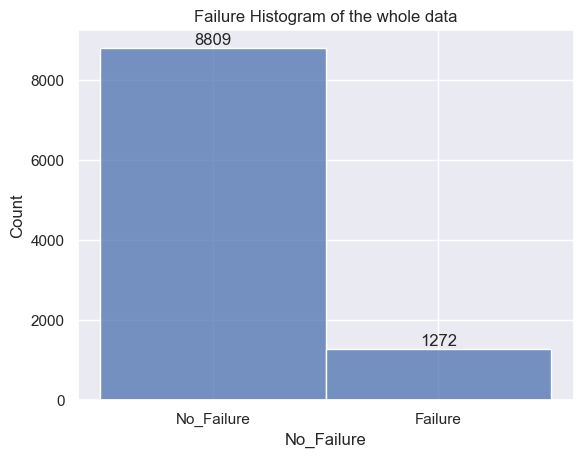

In [102]:
ax = sns.histplot(1-ds_fl["No_Failure"], discrete=True)
plt.title("Failure Histogram of the whole data")
plt.xticks([0, 1], ["No_Failure", "Failure"])
ax.bar_label(ax.containers[1])

##### A bit counter to intuitive finding is that the "Premium" Membership comes with higher failure rate. However, it's not much higher. It's risky to fill missing Membership based on this.

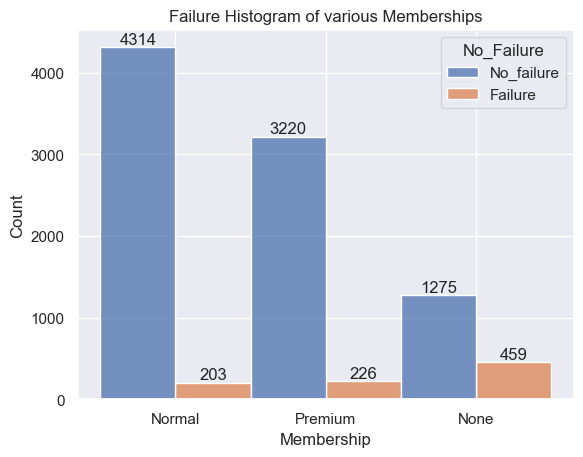

In [12]:
ax=sns.histplot(x="Membership", data=ds_fl, discrete=True, hue=ds_fl["No_Failure"].map({0:"Failure", 1:"No_failure"}), 
             multiple="dodge")
plt.title("Failure Histogram of various Memberships")
for bars in ax.containers:
    ax.bar_label(bars)

##### No obvious link found between membership and Failure type.

Text(1.0, 0.9, 'Membership: Missing')

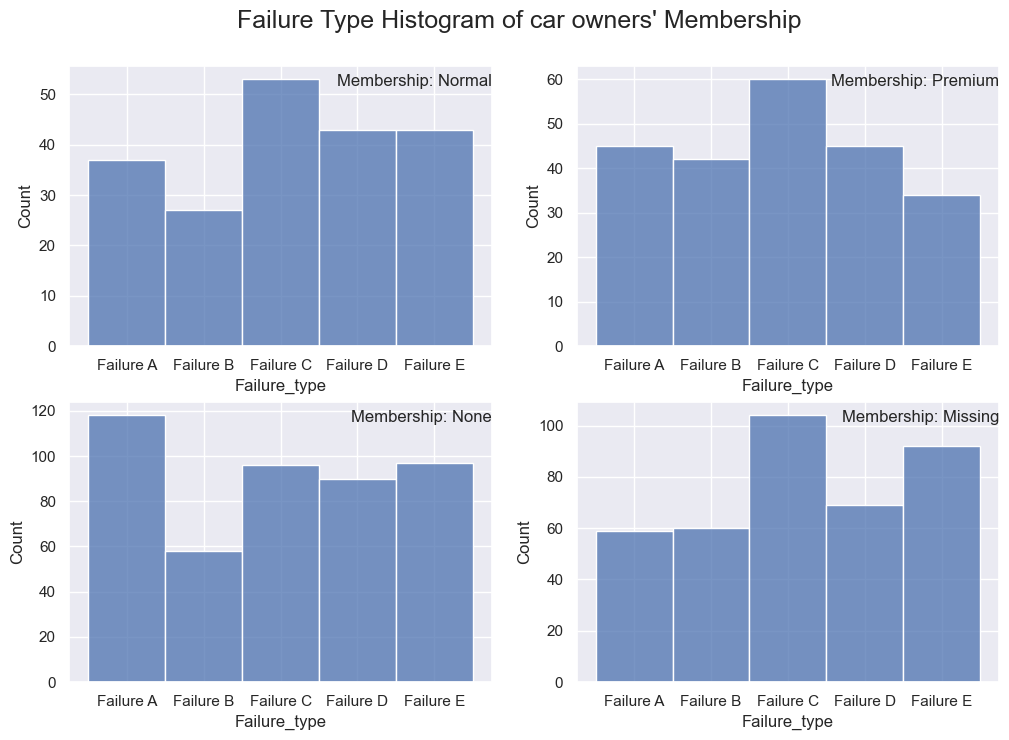

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
plt.suptitle("Failure Type Histogram of car owners' Membership", fontsize=18, y=0.95)
for ms, ax in zip(ds_fl[~ds_fl["Membership"].isnull()]["Membership"].unique(), axes.ravel()):
    sns.histplot(x="Failure_type", data=ds_fl[(ds_fl["No_Failure"] == 0) & (ds_fl["Membership"] == ms)], discrete=True, 
                 ax=ax)
    ax.set_title(f"Membership: {ms}", y=0.9, loc="right")
sns.histplot(x="Failure_type", data=ds_fl[ds_fl["Membership"].isnull()], discrete=True)
axes[1,1].set_title(f"Membership: Missing", y=0.9, loc="right")

##### Since there is no obvious pattern between Membership and other attributes. We'll not link Membership with any other attributes, but the failure. We can randomly assign the missing Membership to be either Normal or Premium with ratio 48:47, which is 194:190. The reasons are as below:

##### 1. All the cars with missing Membership are newer than 2018 (including 2018) and they are all with failure.
##### 2. It's clearly stated in the document that "Car owners are automatically subscribed with “Normal” membership for the first five years after car purchase."
##### 3. There are only two kinds of Membership: Normal and Premium. The ratio of all the cars newer than 2018  (including 2018)  with known membership are almost half to half (1936:1927). The ratio of the cars with failure and newer than 2018  (including 2018) are almost half to half as well (48:47). 

In [11]:
ds_fl.loc[ds_fl["Membership"].isnull(),"Membership"] = \
                            np.random.choice(["Normal", "Premium"], size=384, p=[0.505263, 0.494737])
display(ds_fl.loc[[18, 30, 105, 9990, 9996, 10010],:])

,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E,M_class,M_year,No_Failure,Failure_type
18,d81f4614-cbe0-4e75-a927-e034f390062e,"Model 7, 2020",Black,110.6 °C,1306,"Seng Kang, China",High,892.9,Normal,0,0,1,0,0,Model 7,2020,0,Failure C
30,a2f247b5-c1d5-48de-9c7f-8c5c3028415e,"Model 5, 2018",Red,231.2 °F,1339,"New York, U.S",High,677.7,Premium,0,0,0,1,0,Model 5,2018,0,Failure D
105,27b1aeb4-f55a-4318-a325-7986a2ca9663,"Model 3, 2019",White,110.6 °C,1591,"Shang Hai, China",High,659.6,Normal,0,1,0,0,0,Model 3,2019,0,Failure B
9990,983d3b32-1603-4e6e-aaf6-bfacec6f37f9,"Model 3, 2022",White,231.0 °F,-1527,"New York, U.S",High,600.1,Premium,0,1,0,0,0,Model 3,2022,0,Failure B
9996,0ec0a296-d278-4a97-b35f-8434d5c976e8,"Model 7, 2021",Grey,110.6 °C,1632,"Shang Hai, China",Medium,865.4,Premium,0,1,0,0,0,Model 7,2021,0,Failure B
10010,a2f247b5-c1d5-48de-9c7f-8c5c3028415e,"Model 5, 2018",Red,231.2 °F,1339,"New York, U.S",High,677.7,Premium,0,0,0,1,0,Model 5,2018,0,Failure D


#### \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*

#### 2.2 RPM

##### 223 entries are with negative RPM. Negative RPM doesn't make sense either. Again, unfortunately, no obvious pattern of RPM can be found based on simple Exploratory Data Analysis. It's hard to fill it.

([<matplotlib.axis.XTick at 0x1d40b4a9a60>,
 [Text(0, 0, 'No_Failure'), Text(1, 0, 'Failure')])

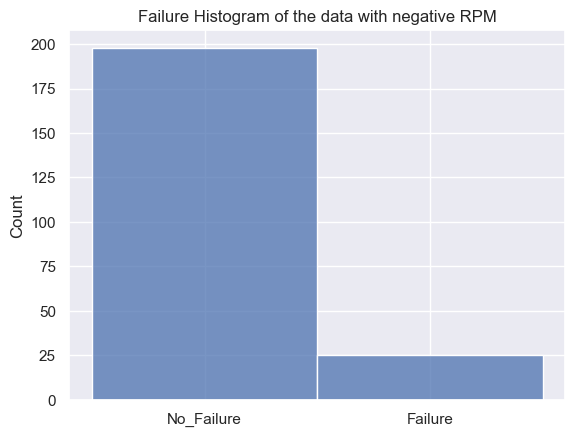

In [29]:
sns.histplot(ds_fl[ds_fl["RPM"]<0].iloc[:,9:14].sum(axis=1), discrete=True)
plt.title("Failure Histogram of the data with negative RPM")
plt.xticks([0, 1], ["No_Failure", "Failure"])

Text(0.5, 0, 'Failure')

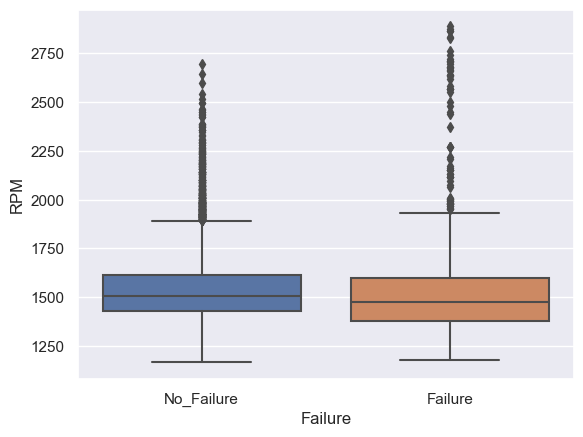

In [83]:
sns.boxplot(x=ds_fl["No_Failure"].map({0:"Failure", 1:"No_Failure"}), y="RPM", data=ds_fl[ds_fl["RPM"]>0])
plt.xlabel("Failure")

Text(0.5, 0, 'Failure')

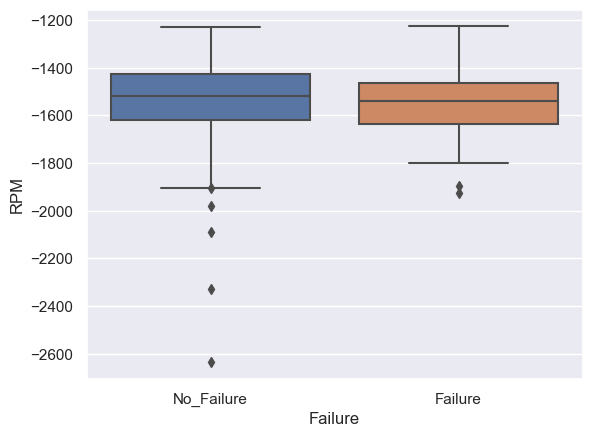

In [84]:
sns.boxplot(x=ds_fl["No_Failure"].map({0:"Failure", 1:"No_Failure"}), y="RPM", data=ds_fl[ds_fl["RPM"]<0])
plt.xlabel("Failure")

#### \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*

##### There is one entry with temperature 230.7 °C. It's probably a unit error. However, this is just 1 out of 10081, it's not so importnat. We can either drop it or assume it's 230.7 "°F" which is 110.4 °C. 

##### We correct it to 110.4 °C here.

Text(0.5, 0, 'Failure')

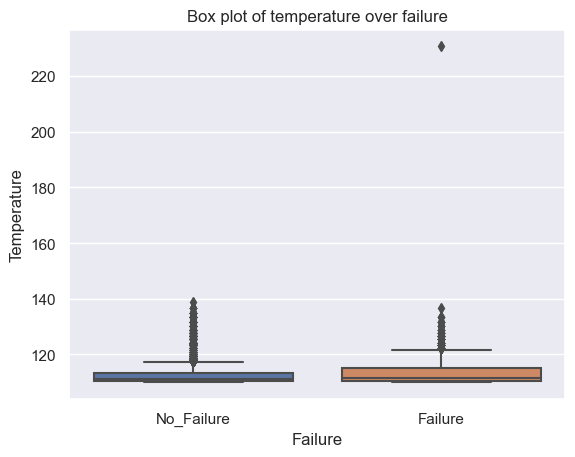

In [135]:
sns.boxplot(x=ds_fl["No_Failure"].map({0:"Failure", 1:"No_Failure"}), y="Temperature", data=ds_fl)
plt.title("Box plot of temperature over failure")
plt.xlabel("Failure")

##### The "Temprature" attribute comes with two units: "°C" and "°F". Convert all of them to unit "°C".

In [118]:
ds_fl["Temperature"] = ds_fl["Temperature"].str.split().\
                       map(lambda x: x[0] if (x[1] == "°C") else round((float(x[0])-32)/1.8, 1)).astype("float")

In [139]:
display(ds_fl[ds_fl["Temperature"]>140])
ds_fl.loc[ds_fl["Temperature"]>140, "Temperature"] = 110.4

,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E,M_class,M_year,No_Failure,Failure_type
4,110.4,110.4,White,230.7,1408,"New York, U.S",High,660.9,Normal,0,1,0,0,0,Model 3,2022,0,Failure B


# \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*

### 3. Exploratory Data Analysis (EDA)

#### \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*

##### 1. The color has no impact on failure. The Test for Association shows no association between color and failure. It can be skipped in later machine learning pahse. 

##### 2. The model class and failure are correlated. Test for Association confirm that. Model 5 has the smallest failure rate while Model 3 has the highest failure rate. The failure rate of the high end model, model 7, is actually higher than model 5.

##### 3. The failure rate of older model is higher which probably mainly due to aging effect and then reach to a kind of flat level. However, the failure rate of year 2022 model is quite high, espcially the model 3 and model 5. It's worrisome. The smaller sample size might partly decreases its statistical significance. But it should be investigated further. 

##### 4. The "Shang Hai, China" factory produced the most of the cars. However, the plto and the Test for Association shows no association between factory and failure. It can be skipped in later machine learning pahse. 

##### 5. The usage and failure are high correlated. The higher the usage is, the bigger the failure rate is.

##### 6. the failure rate is very high without memebership as car servicing on them are much less or even none and they are usually old as well. One disappointed finding is cars of Premium member have higher failure rate than the Normal member. It's the case accross all the usage categories. However, there might be social or psychological reasons behind it which we can tell from this data. For example, the driving habit might not be so good as they have Premium member anyway. Of course, it can't explain all. It's still a question whether it's really worth to buy Premium membership.

##### 7. The temperature effect is not so clear based on this simple EDA. The mean temperture of the engine is slightly higher with failure, but no so obvious. The 75% quartile of temperture is a few degree higher with failure. Overall, the ranges of temperature of cars with or without failure are not that different

##### 8. The RPM effect is not so clear based on this simple EDA either.It seems that the RPM tends to be smaller when failure happens. Overall, the ranges of RPM of cars with or without failure are not that different

##### 9. It seems that the Fuel consumption tends to be higher when failure happens. The 25%, 50% and 75% quartiles are all highers. However, the ranges of Fuel consumption of cars with or without failure are not that different

#### \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*

#### 3.1 Failure

##### The failure rate is around 12.6%. Failure C is the most common failure while Failure B is the least common one.

The failure rate is 0.12617795853585953, i.e. 1272 failure out of 10081 cars


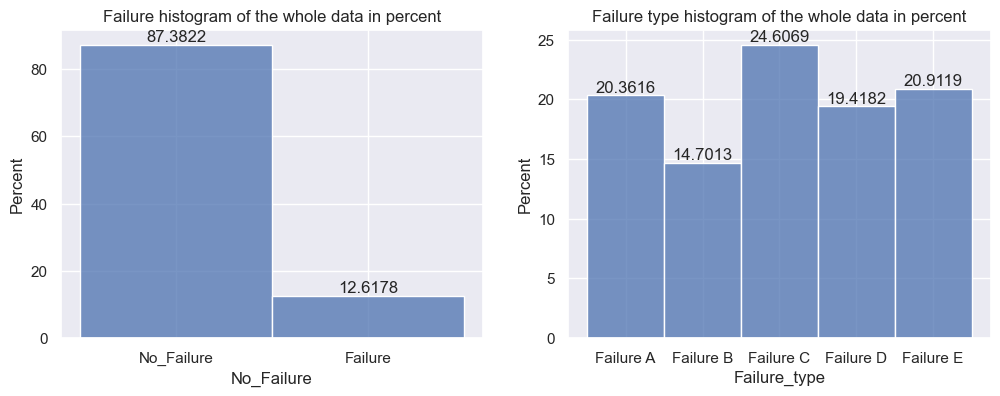

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(x=ds_fl["No_Failure"].map({0:"Failure", 1:"No_Failure"}), data=ds_fl, discrete=True, stat="percent", 
             ax=axes[0])
axes[0].set_title("Failure histogram of the whole data in percent")
axes[0].set_xticks([0, 1], ["No_Failure", "Failure"])
axes[0].bar_label(axes[0].containers[1])

# ds_fl[(ds_fl["No_Failure"] == 0)]
sns.histplot(x="Failure_type", data=ds_fl[ds_fl["No_Failure"] == 0], discrete=True, stat="percent", ax=axes[1])
axes[1].set_title("Failure type histogram of the whole data in percent")
axes[1].bar_label(axes[1].containers[1])

print(f'The failure rate is {len(ds_fl[ds_fl["No_Failure"] == 0])/len(ds_fl)}, i.e. \
{len(ds_fl[ds_fl["No_Failure"] == 0])} failure out of {len(ds_fl)} cars')


#### \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*

#### 3.2 Color and Failure

##### Based on common sense, we can say color should have no impact on failure. The histogram plot confirms it. The failure rate for each color are reasonably consistent which is around 13%. 

##### Blue cars come with slightly less failure rate while grey cares have a little bit more. 

##### One interesing finding is white color is significantly preferred. Over 50% of the cars are white. Generally, it's true white color might be the favorite. But it shouldn't go this far. In a sense, it tells us the data is kind of biased.  It shouldn't be a big deal as color shouldn't impact the failure.

[Text(0, 0, '12.9002'),
 Text(0, 0, '11.1013'),
 Text(0, 0, '13.8278'),
 Text(0, 0, '12.8315'),
 Text(0, 0, '12.5911')]

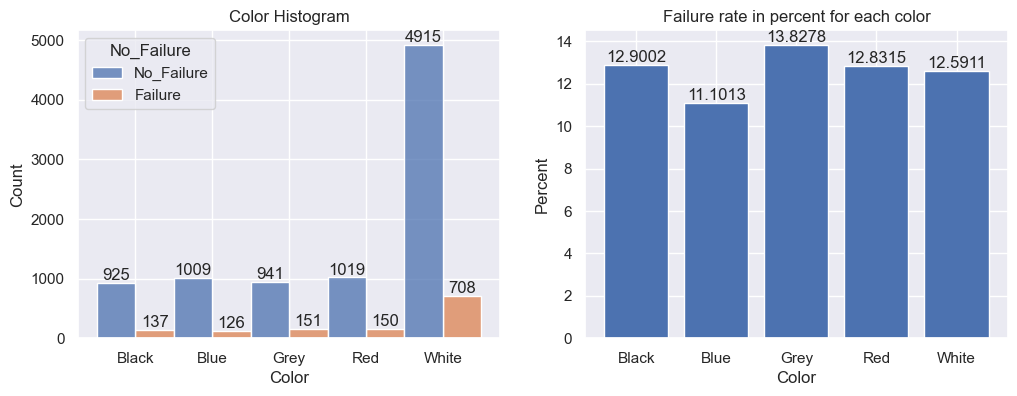

In [119]:
ds_fl["Color"] = pd.Categorical(ds_fl["Color"]).as_ordered()

fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(x="Color", data=ds_fl, discrete=True, hue=ds_fl["No_Failure"].map({0:"Failure", 1:"No_Failure"}), 
                 multiple="dodge", ax=axes[0])
axes[0].set_title("Color Histogram")
for bars in axes[0].containers:
    axes[0].bar_label(bars)

axes[1].bar(ds_fl["Color"].cat.categories, 100*ds_fl[ds_fl["No_Failure"] == 0]["Color"].groupby(ds_fl["Color"]).count()/\
                                      ds_fl["Color"].groupby(ds_fl["Color"]).count())
axes[1].set_title("Failure rate in percent for each color")
axes[1].set_xlabel("Color")
axes[1].set_ylabel("Percent")
axes[1].bar_label(axes[1].containers[0])

##### The Test for Association shows that the pvalue is 41% which is quite big. It confirms that there is no association between Color and Failure.

In [133]:
color_obs=pd.concat([ds_fl[ds_fl["No_Failure"] == 0]["Color"].groupby(ds_fl["Color"]).count().rename("Failure"), 
                    ds_fl[ds_fl["No_Failure"] == 1]["Color"].groupby(ds_fl["Color"]).count().rename("No_Failure")], axis=1)
display(color_obs)
res = stats.chi2_contingency(color_obs)
print("The pvalue of the test for association between 'Color' and 'Failure':", res[1])

,Failure,No_Failure
Color,,
Black,137,925
Blue,126,1009
Grey,151,941
Red,150,1019
White,708,4915


The pvalue of the test for association between 'Color' and 'Failure': 0.413315907839081


##### The pvalue of Test for Association between (Black, Red and White) and Failure is as high as 95%. However, the pvalue of Test for Association between (Blue and Grey) is only 6% which is still bigger than the usual 5% alpha. 

In [136]:
res = stats.chi2_contingency(color_obs.loc[["Black", "Red", "White"]])
print("The pvalue of the test for association between 'Color (Black, Red and White)' and 'Failure':", res[1])
res = stats.chi2_contingency(color_obs.loc[["Blue", "Grey"]])
print("The pvalue of the test for association between 'Color (Blue and Grey)' and 'Failure':", res[1])

The pvalue of the test for association between 'Color (Black, Red and White)' and 'Failure': 0.9464826756792105
The pvalue of the test for association between 'Color (Blue and Grey)' and 'Failure': 0.05945461855124308


##### Simple histogram shows the Failure Type is consistent among different colors. Failure C is the most common failure while Failure B is the least common one. Failure B is particularly low among Grey and Red. But the sample sizes are overall small.

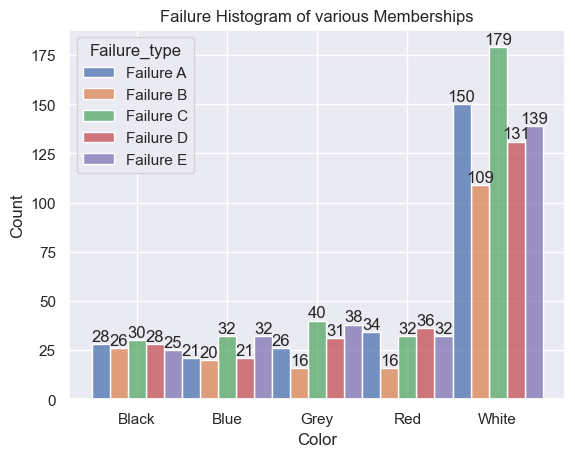

In [138]:
ax=sns.histplot(x="Color", data=ds_fl[ds_fl["No_Failure"] == 0], discrete=True, multiple="dodge",
                hue=ds_fl[ds_fl["No_Failure"] == 0]["Failure_type"].cat.remove_unused_categories())
plt.title("Failure Histogram of various Memberships")
for bars in ax.containers:
    ax.bar_label(bars)

##### Conclusion: The impact from Color on Failure is small. We can drop it in the machine learing phase.

#### \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*

#### 3.3 Model 

##### There are more than 41 Models which is the combination of model class and year. After we split the Model in to model class (Model 3, 5, 7) and years, histogram shows that Model 5 has the least Failure rate and Model 3 has the highest failure rate. However, the failure rate varies around the overall failure rate 12.6% in a moderate way. 

[Text(0, 0, '13.438'), Text(0, 0, '10.9639'), Text(0, 0, '12.6482')]

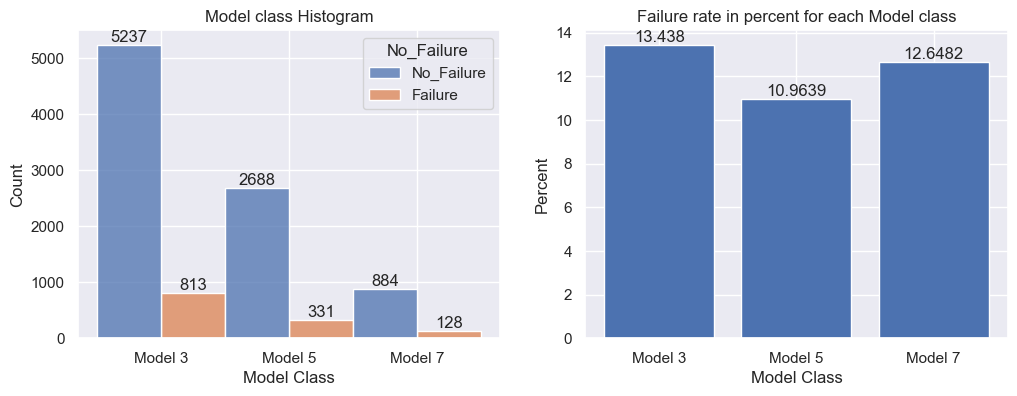

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(x="M_class", data=ds_fl, discrete=True, hue=ds_fl["No_Failure"].map({0:"Failure", 1:"No_Failure"}), 
                 multiple="dodge", ax=axes[0])
axes[0].set_title("Model class Histogram")
axes[0].set_xlabel("Model Class")
for bars in axes[0].containers:
    axes[0].bar_label(bars)

axes[1].bar(ds_fl["M_class"].cat.categories, 100*ds_fl[ds_fl["No_Failure"] == 0]["M_class"].groupby(ds_fl["M_class"]).\
                  count()/ds_fl["M_class"].groupby(ds_fl["M_class"]).count())
axes[1].set_title("Failure rate in percent for each Model class")
axes[1].set_xlabel("Model Class")
axes[1].set_ylabel("Percent")
axes[1].bar_label(axes[1].containers[0])

##### The Test for Association shows that the pvalue is 0.37% which is quite small. It confirms that there is association between car class and Failure.

In [95]:
mc_obs=pd.concat([ds_fl[ds_fl["No_Failure"] == 0]["M_class"].groupby(ds_fl["M_class"]).count().rename("Failure"), 
                  ds_fl[ds_fl["No_Failure"] == 1]["M_class"].groupby(ds_fl["M_class"]).count().rename("No_Failure")], 
                  axis=1)
res = stats.chi2_contingency(mc_obs)
print("The pvalue of the test for association between 'Model class' and 'Failure':", res[1])

The pvalue of the test for association between 'Model class' and 'Failure': 0.0037307312749321904


##### Drop 2009 for histogram plot as there are only two entries. It's biased when ploting the Failure histogram in percent of the number of cars of the year. 

##### The numbers of entries for year 2010 and 2011 are still much less than other years. Overall, the number of cars distributes quite equally among years. It's the cases for model classes as well. The data is NOT biased to certain year or certain model wihch is good.

##### The failure rate of year 2022 model is quite high, espcially the model 3 and model 5. It's worrisome. The smaller sample size might partly decreases its statistical significance. But it should be investigated further. 

Text(0.5, 0, 'Model Year')

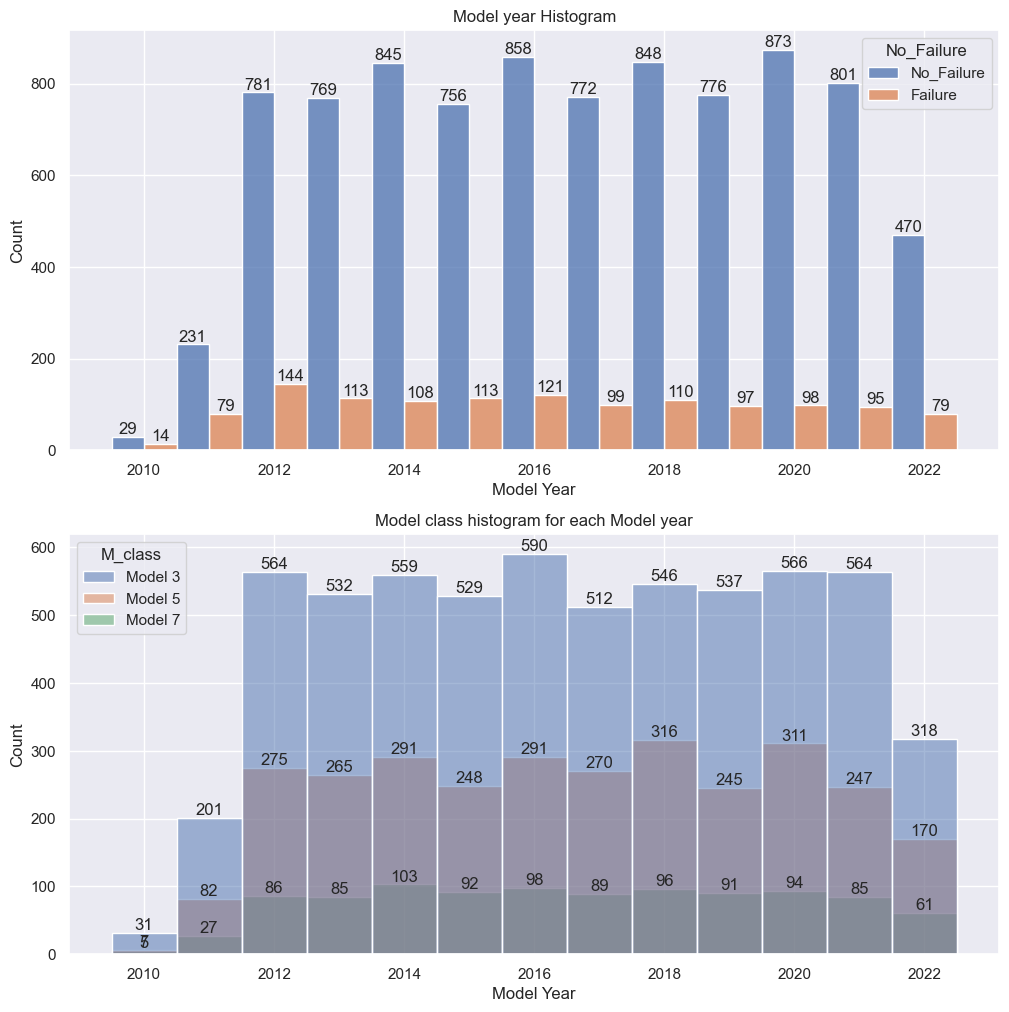

<Figure size 1600x600 with 0 Axes>

In [98]:
fig, axes = plt.subplots(2, 1, figsize=(12,12))

sns.histplot(x="M_year", data=ds_fl[ds_fl["M_year"] > 2009], discrete=True, 
             hue=ds_fl["No_Failure"].map({0:"Failure", 1:"No_Failure"}), multiple="dodge", ax=axes[0])
axes[0].set_title("Model year Histogram")
axes[0].set_xlabel("Model Year")
for bars in axes[0].containers:
    axes[0].bar_label(bars)
    
    
plt.figure(figsize=(16, 6))
sns.histplot(x="M_year", data=ds_fl[ds_fl["M_year"] > 2009], discrete=True, hue="M_class", ax=axes[1])
for bars in axes[1].containers:
    axes[1].bar_label(bars)
axes[1].set_title("Model class histogram for each Model year")
axes[1].set_xlabel("Model Year")

##### It generally makes sense that the failure rate is higher when the cars are older and then reaches a stable ratio.

##### The failure rate of each model class shows some fluctuation among years.

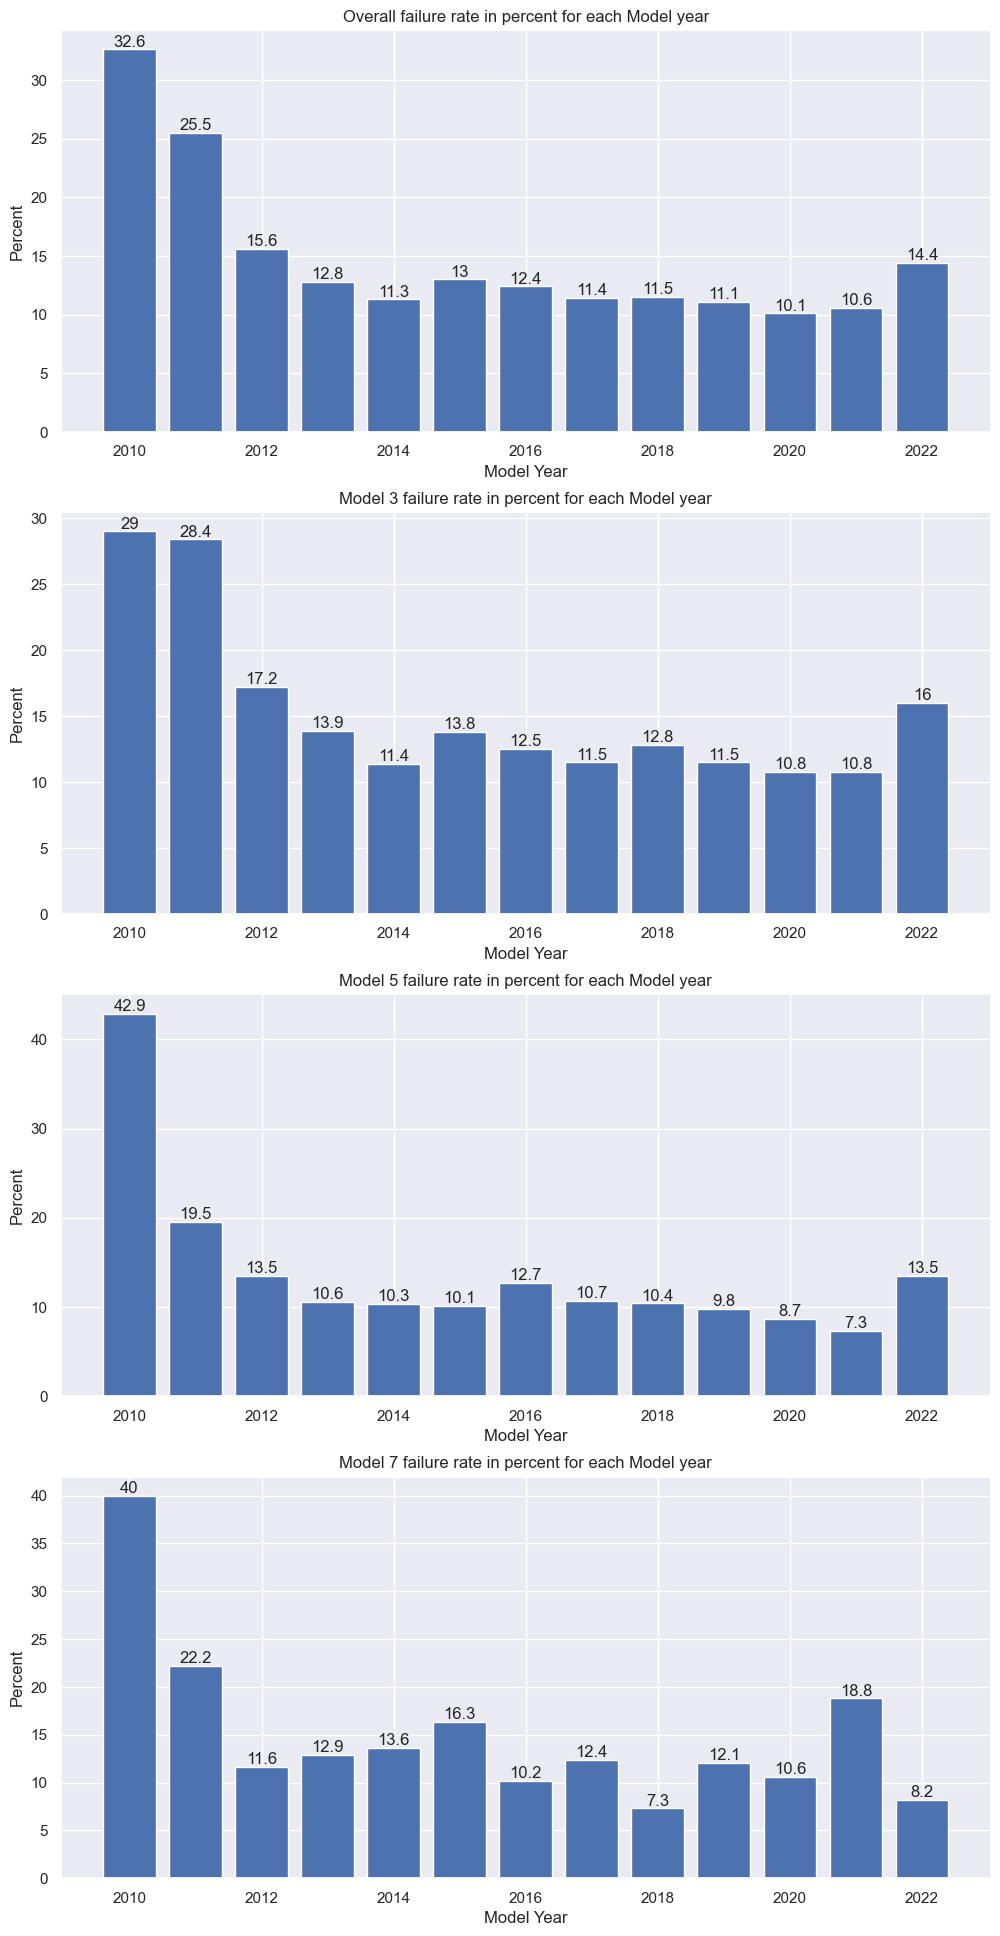

In [70]:
fig, axes = plt.subplots(4, 1, figsize=(12,24))
# sns.histplot(x="M_year", data=ds_fl, discrete=True, ax=axes[0])
# axes[0].set_title("Model year Histogram")
# for bars in axes[0].containers:
#     axes[0].bar_label(bars)
    

axes[0].bar(np.sort(ds_fl["M_year"].unique()), 100*(ds_fl[(ds_fl["No_Failure"] == 0) & (ds_fl["M_year"] > 2009)]["M_year"]\
            .groupby(ds_fl["M_year"]).count()/ds_fl["M_year"].groupby(ds_fl["M_year"]).count()).round(3))
axes[0].set_title("Overall failure rate in percent for each Model year")
axes[0].set_xlabel("Model Year")
axes[0].bar_label(axes[0].containers[0])
axes[0].set_ylabel("Percent")

for mc, ax in zip(ds_fl["M_class"].cat.categories, axes.ravel()[1:4]):
    ax.bar(np.sort(ds_fl["M_year"].unique())[1:], \
        100*(ds_fl[(ds_fl["No_Failure"] == 0) & (ds_fl["M_year"] > 2009) & (ds_fl["M_class"] == mc)]["M_year"].\
        groupby(ds_fl["M_year"]).count() / \
        ds_fl[(ds_fl["M_year"] > 2009) & (ds_fl["M_class"] == mc)]["M_year"].groupby(ds_fl["M_year"]).count()).round(3))
    ax.set_title(f"{mc} failure rate in percent for each Model year")
    ax.set_xlabel("Model Year")
    ax.bar_label(ax.containers[0])
    ax.set_ylabel("Percent")

#### Conclusion: 

##### There is a certain level of association between car class and failure. Model 5 has the least Failure rate and Model 3 has the highest failure rate.

##### The failure rate is higher when the cars are older as the aging effect comes into play and then it reaches a relatively stable ratio. Each model class shows roughly similar pattern, even though not exact the same.

#### \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*

#### 3.4 Factory

##### There are 6 factories:  'Shang Hai, China',  'Berlin, Germany', 'New York, U.S', 'Seng Kang, China', 'Newton, China', 'Bedok, Germany'.

##### Very a few cars are from factories: 'Seng Kang, China', 'Newton, China', 'Bedok, Germany'. They all are with failure. The model year is distributed among 2010 to 2022. It doesn't make sense that those facotories manufacture so a few cars and all cars failed. They should be dropped or used with cautions. 

Text(0.5, 1.0, 'Histogram of factory for cars with failure')

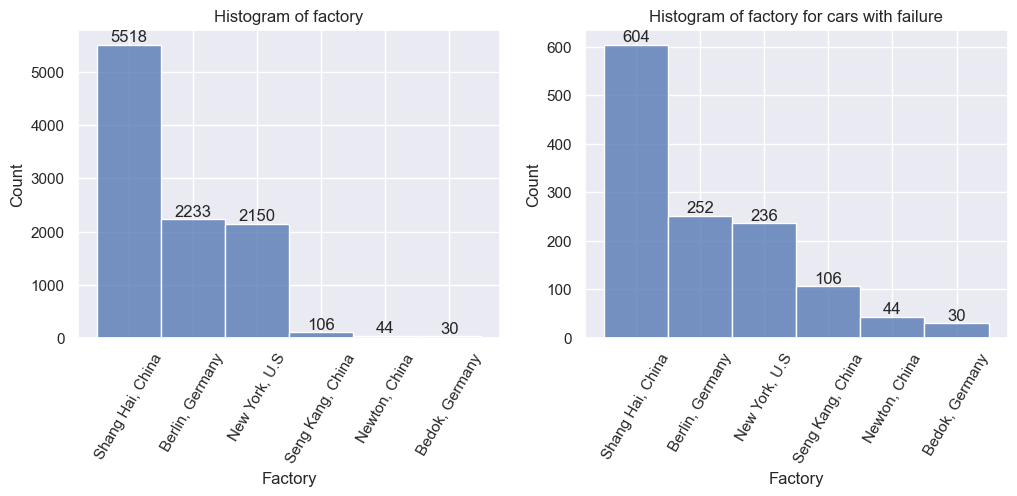

In [133]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(x="Factory", data=ds_fl, discrete=True, ax=axes[0])
axes[0].bar_label(axes[0].containers[1])
axes[0].tick_params(axis='x', labelrotation=60)
axes[0].set_title("Histogram of factory")

sns.histplot(x="Factory", data=ds_fl[ds_fl["No_Failure"] == 0], discrete=True, ax=axes[1])
axes[1].bar_label(axes[1].containers[1])
axes[1].tick_params(axis='x', labelrotation=60)
axes[1].set_title("Histogram of factory for cars with failure")

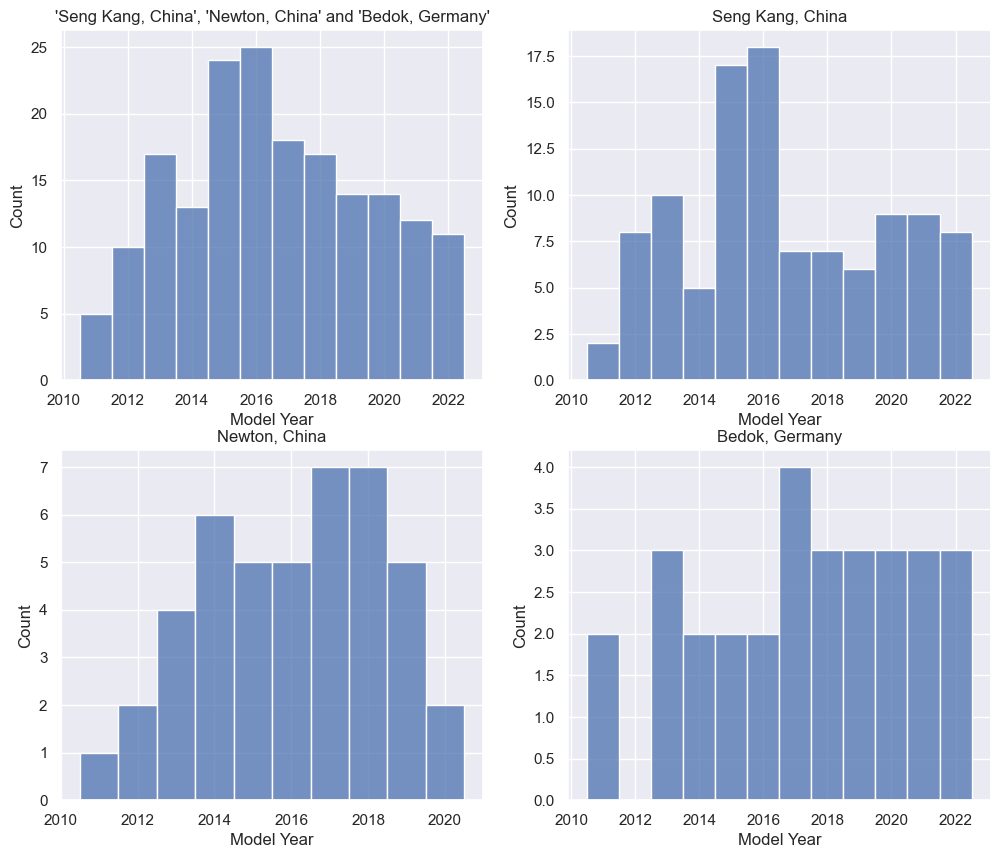

In [155]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))

sns.histplot(x="M_year", data=ds_fl[ds_fl["Factory"].isin(['Seng Kang, China', 'Newton, China', 'Bedok, Germany'])], 
             discrete=True, ax=axes[0, 0])
axes[0,0].set_title(f"'Seng Kang, China', 'Newton, China' and 'Bedok, Germany'")
axes[0,0].set_xlabel("Model Year")

for ft, ax in zip(['Seng Kang, China', 'Newton, China', 'Bedok, Germany'], axes.ravel()[1:]):
    sns.histplot(x="M_year", data=ds_fl[ds_fl["Factory"] == ft], discrete=True, ax=ax)
    ax.set_title(f"{ft}")
    ax.set_xlabel("Model Year")

##### The failure rate of three valid facotries 'Shang Hai, China',  'Berlin, Germany', 'New York, U.S' are reaonsably equal. The Test of Association shows no association between "Factory" and "Failure"

[Text(0, 0, '11.2853'), Text(0, 0, '10.9767'), Text(0, 0, '10.946')]

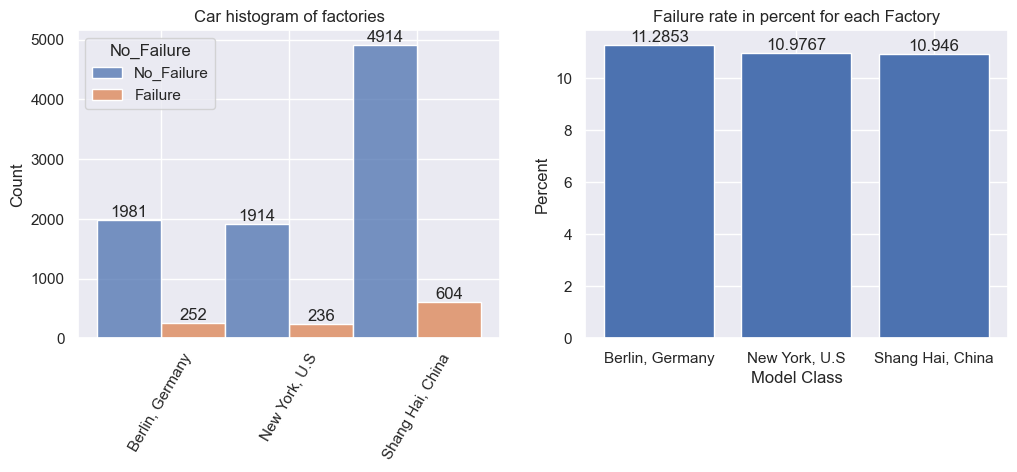

In [120]:
valid_factories = ['Shang Hai, China', 'Berlin, Germany', 'New York, U.S']
valid_factories.sort()

fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(x=pd.Categorical(ds_fl[ds_fl["Factory"].isin(valid_factories)]["Factory"], valid_factories), 
             data=ds_fl[ds_fl["Factory"].isin(valid_factories)], discrete=True, 
             hue=ds_fl[ds_fl["Factory"].isin(valid_factories)]["No_Failure"].map({0:"Failure", 1:"No_Failure"}), 
             multiple="dodge", ax=axes[0])
axes[0].tick_params(axis='x', labelrotation=60)
axes[0].set_title("Car histogram of factories")
for bars in axes[0].containers:
    axes[0].bar_label(bars)
    
axes[1].bar(valid_factories, \
            100*ds_fl[(ds_fl["No_Failure"] == 0) & (ds_fl["Factory"].isin(valid_factories))]["Factory"].\
            groupby(ds_fl["Factory"]).count()/\
            ds_fl[ds_fl["Factory"].isin(valid_factories)]["Factory"].groupby(ds_fl["Factory"]).count())
axes[1].set_title("Failure rate in percent for each Factory")
axes[1].set_xlabel("Model Class")
axes[1].set_ylabel("Percent")
axes[1].bar_label(axes[1].containers[0])

In [203]:
fct_obs=pd.concat([ds_fl[(ds_fl["No_Failure"] == 0) & (ds_fl["Factory"].isin(valid_factories))]["Factory"].
                     groupby(ds_fl["Factory"]).count().rename("Failure"), 
                    ds_fl[(ds_fl["No_Failure"] == 1) & (ds_fl["Factory"].isin(valid_factories))]["Factory"].
                     groupby(ds_fl["Factory"]).count().rename("No_Failure")], axis=1)
res = stats.chi2_contingency(fct_obs)
print("The pvalue of the test for association between 'Factory' and 'Failure':", res[1])

The pvalue of the test for association between 'Factory' and 'Failure': 0.9074783655899362


Text(0.5, 0, 'Factory')

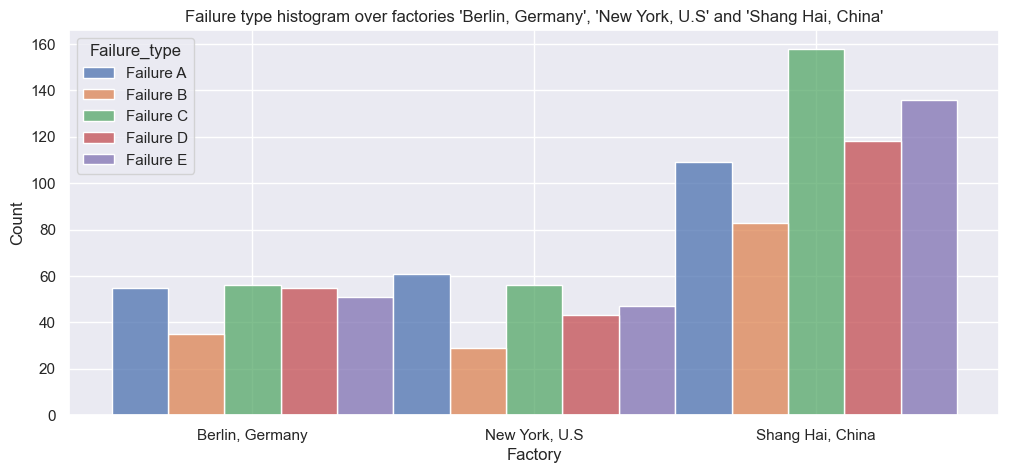

In [240]:
plt.figure(figsize=(12, 5))
sns.histplot(x=pd.Categorical(ds_fl[(ds_fl["No_Failure"] == 0) & (ds_fl["Factory"].isin(valid_factories))]["Factory"], 
                              valid_factories), 
             data=ds_fl[(ds_fl["No_Failure"] == 0) & (ds_fl["Factory"].isin(valid_factories))],
             hue=ds_fl[(ds_fl["No_Failure"] == 0) & (ds_fl["Factory"].isin(valid_factories))]["Failure_type"].
                 cat.remove_unused_categories(),
             multiple="dodge", discrete=True)
plt.title("Failure type histogram over factories 'Berlin, Germany', 'New York, U.S' and 'Shang Hai, China'")
plt.xlabel("Factory")

Text(0.5, 0, 'Factory')

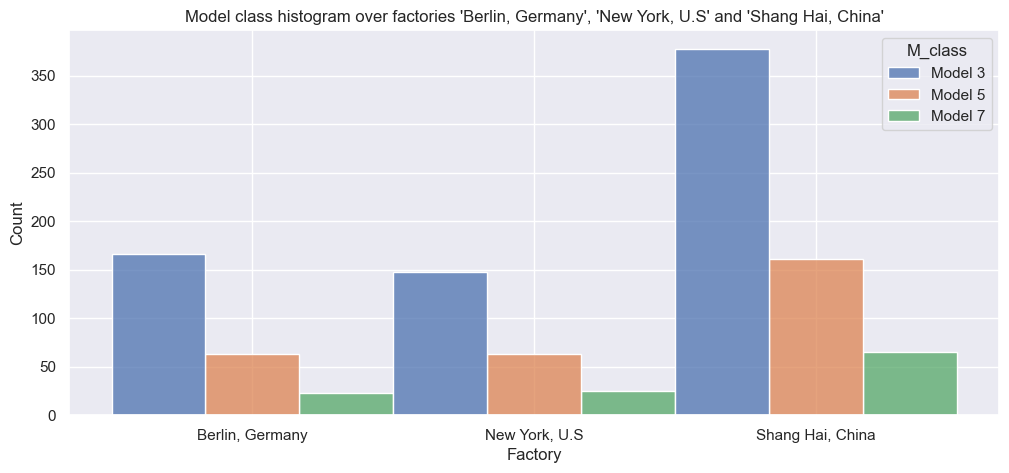

In [239]:
plt.figure(figsize=(12, 5))
sns.histplot(x=pd.Categorical(ds_fl[(ds_fl["No_Failure"] == 0) & (ds_fl["Factory"].isin(valid_factories))]["Factory"], 
                              valid_factories), 
             data=ds_fl[(ds_fl["No_Failure"] == 0) & (ds_fl["Factory"].isin(valid_factories))],
             hue="M_class", 
             multiple="dodge", discrete=True)
plt.title("Model class histogram over factories 'Berlin, Germany', 'New York, U.S' and 'Shang Hai, China'")
plt.xlabel("Factory")

#### Conclusion:

##### It looks like factory has negeligible impact on failure. It can be drop during machine learning phase.

#### \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*

#### 3.5 Usage

##### Usage generally equally distributed. High usage is slightly more than Medium usage and Medium usage is slightly more than Low usage.

##### As expected, usage and failure are high correlated. The higher the usage is, the bigger the failure rate is.

[Text(0, 0, '6.926'), Text(0, 0, '12.9167'), Text(0, 0, '17.3925')]

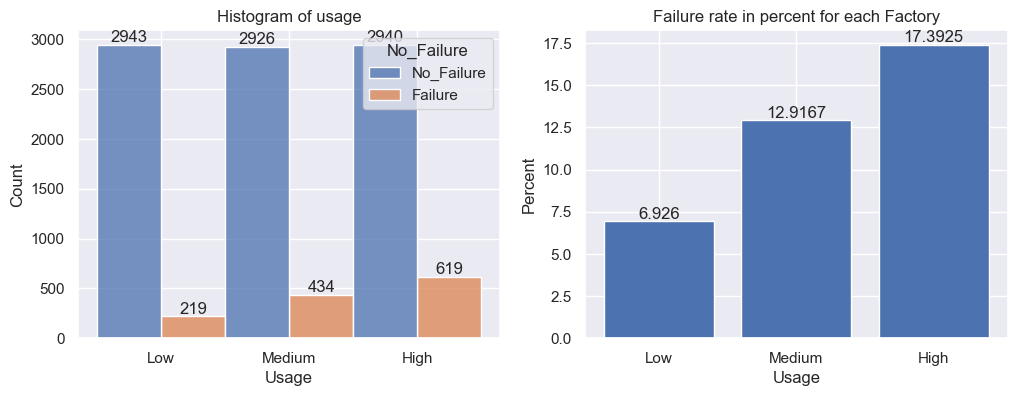

In [121]:
ds_fl["Usage"] = pd.Categorical(ds_fl["Usage"], ["Low", "Medium", "High"])

fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(x="Usage", data=ds_fl, discrete=True, hue=ds_fl["No_Failure"].map({0:"Failure", 1:"No_Failure"}), 
             multiple="dodge", ax=axes[0])
for bars in axes[0].containers:
    axes[0].bar_label(bars)
axes[0].set_title("Histogram of usage")

axes[1].bar(ds_fl["Usage"].cat.categories, 100*ds_fl[ds_fl["No_Failure"] == 0]["Usage"].groupby(ds_fl["Usage"]).count()/\
                                      ds_fl["Usage"].groupby(ds_fl["Usage"]).count())
axes[1].set_title("Failure rate in percent for each Factory")
axes[1].set_xlabel("Usage")
axes[1].set_ylabel("Percent")
axes[1].bar_label(axes[1].containers[0])

##### Failure C is still the most common failure among all the usage. Failure B is the least common one and it doesn't increase according usage as fast as other failure.

Text(0.5, 1.0, 'Failure type histogram over usage')

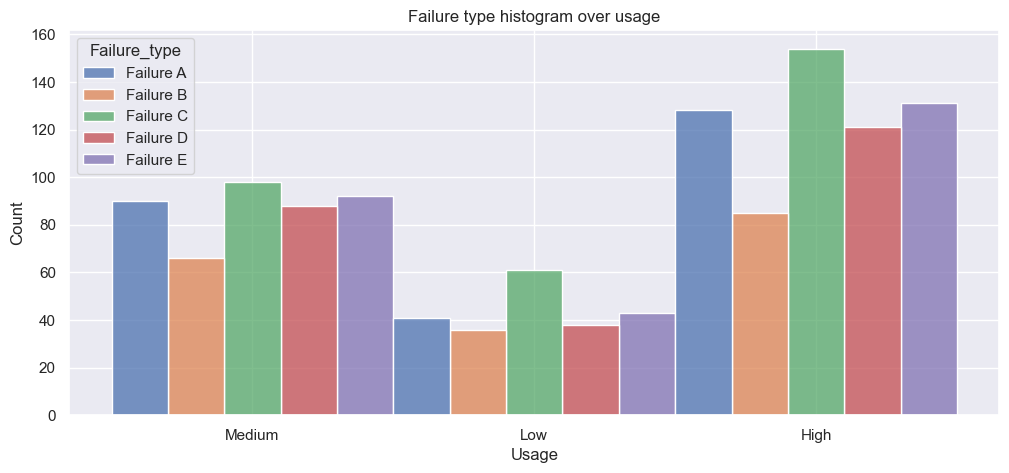

In [17]:
plt.figure(figsize=(12, 5))
sns.histplot(x="Usage", data=ds_fl, discrete=True, 
             hue=ds_fl[ds_fl["No_Failure"] == 0]["Failure_type"].cat.remove_unused_categories(), 
             multiple="dodge")
plt.title("Failure type histogram over usage")

##### Overall, Model 5 has the lowest failure rate. The failure rate are more or less similar among all 3 models when usage is medium. 

##### When the usage changes from low to medium, the failure rate of Model 5 and Model 7 increases faster than Model 3. 

##### When the usage changes from medium to high, Model 5 holds the failure rate nicely. However, the failure rate increases significantly for  Model 3 and Model 7, especially for Model 3. 

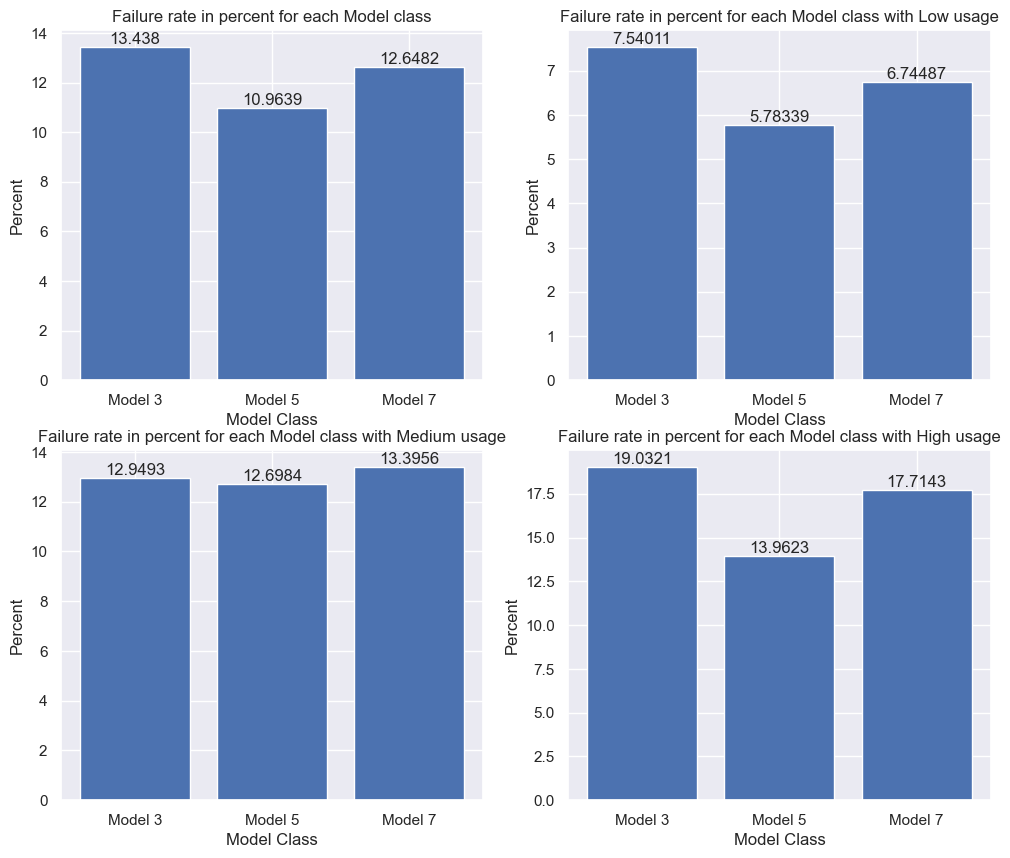

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))
    
axes[0, 0].bar(ds_fl["M_class"].cat.categories, 100*ds_fl[ds_fl["No_Failure"] == 0]["M_class"].groupby(ds_fl["M_class"]).\
               count()/ds_fl["M_class"].groupby(ds_fl["M_class"]).count())
axes[0, 0].set_title("Failure rate in percent for each Model class")
axes[0, 0].set_xlabel("Model Class")
axes[0, 0].set_ylabel("Percent")
axes[0, 0].bar_label(axes[0, 0].containers[0])

for us, ax in zip(ds_fl["Usage"].cat.categories, axes.ravel()[1:]):
    ax.bar(ds_fl["M_class"].cat.categories, 100*ds_fl[(ds_fl["No_Failure"] ==0) & (ds_fl["Usage"] == us)]["M_class"].\
                   groupby(ds_fl["M_class"]).\
                   count()/ds_fl[ds_fl["Usage"] == us]["M_class"].groupby(ds_fl["M_class"]).count())
    ax.set_title(f"Failure rate in percent for each Model class with {us} usage")
    ax.set_xlabel("Model Class")
    ax.set_ylabel("Percent")
    ax.bar_label(ax.containers[0])

#### Conclusion:

##### Usage generally equally distributed in the data. 

##### Usage and failure are high correlated. The higher the usage is, the bigger the failure rate is.

#### Overall, Model 5 has the lowest failure rate. The failure rate are more or less similar among all 3 models when usage is medium. 

##### When the usage changes from low to medium, the failure rate of Model 5 and Model 7 increases faster than Model 3. 

##### When the usage changes from medium to high, Model 5 holds the failure rate nicely. However, the failure rate increases significantly for  Model 3 and Model 7, especially for Model 3. 

#### \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*

#### 3.6 Membership

##### It's understandable that Normal is the most common membership. The number of two relatively extreme membership are less. 

##### Again, as expected, the failure rate is very high without memebership as car servicing on them are much less or even none and they are old as well.

##### One disappointed finding is cars of Premium member have higher failure rate than the Normal member. It's the case accross all the usage categories. However, there might be social or psychological reasons behind it which we can tell from this data. For example, the driving habit might not be so good as they have Premium member anyway. Of course, it can't explain all. It's still a question whether it's really worth to buy Premium membership.

[Text(0, 0, '118'),
 Text(0, 0, '58'),
 Text(0, 0, '96'),
 Text(0, 0, '90'),
 Text(0, 0, '97')]

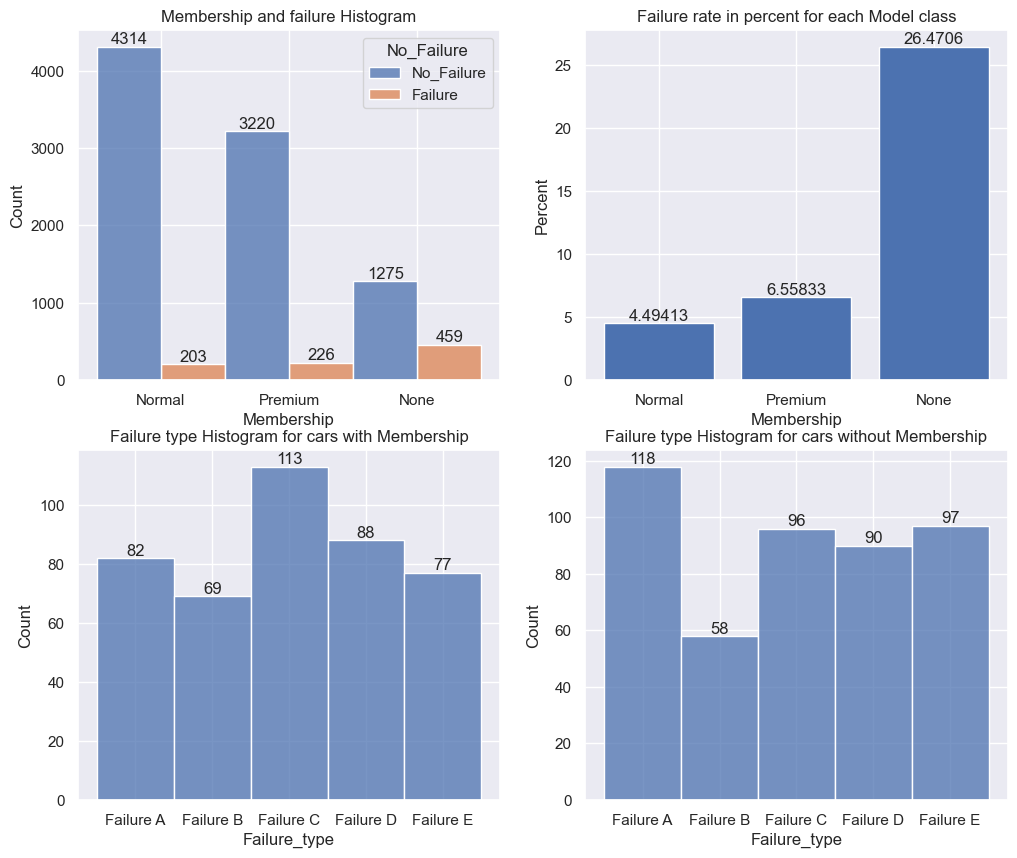

In [122]:
ds_fl["Membership"] = pd.Categorical(ds_fl["Membership"], ["Normal", "Premium", "None"])

fig, axes = plt.subplots(2, 2, figsize=(12,10))

sns.histplot(x="Membership", data=ds_fl, discrete=True, hue=ds_fl["No_Failure"].map({0:"Failure", 1:"No_Failure"}), 
             multiple="dodge", ax = axes[0, 0])
axes[0, 0].set_title("Membership and failure Histogram")
for bars in axes[0, 0].containers:
    axes[0, 0].bar_label(bars)

axes[0, 1].bar(ds_fl["Membership"].cat.categories, \
               100*ds_fl[ds_fl["No_Failure"] == 0]["Membership"].groupby(ds_fl["Membership"]).count()/\
               ds_fl["Membership"].groupby(ds_fl["Membership"]).count())
axes[0, 1].set_title("Failure rate in percent for each Model class")
axes[0, 1].set_xlabel("Membership")
axes[0, 1].set_ylabel("Percent")
axes[0, 1].bar_label(axes[0, 1].containers[0])

sns.histplot(x="Failure_type", data=ds_fl[(ds_fl["No_Failure"] == 0) & (ds_fl["Membership"].isin(["Normal", "Premium"]))], 
             discrete=True, ax = axes[1, 0])
axes[1, 0].set_title("Failure type Histogram for cars with Membership")
axes[1, 0].bar_label(axes[1, 0].containers[1])

sns.histplot(x="Failure_type", data=ds_fl[(ds_fl["No_Failure"] == 0) & (ds_fl["Membership"] == "None")], 
             discrete=True, ax = axes[1, 1])
axes[1, 1].set_title("Failure type Histogram for cars without Membership")
axes[1, 1].bar_label(axes[1, 1].containers[1])

##### We have to use data earlier than 2018 to analyze the association between failure, membership and usage as the membership of the 384 entries is filled without consideration of usage. 

##### The high usage ratio is higher for Premium members, espcially for the failed ones. However, the failure rate of Premium member is still clearly higher than Normal member across all the usage categories. It suggests that it's not necessary to be Premium member.

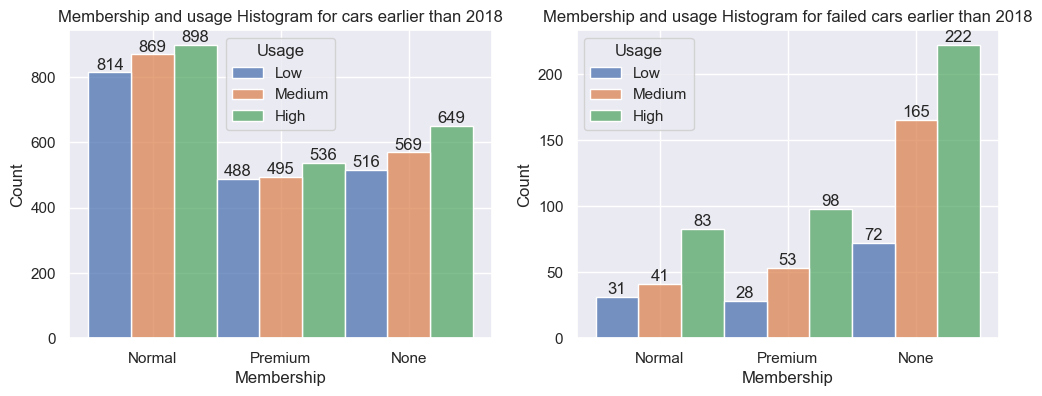

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(x="Membership", data=ds_fl[ds_fl["M_year"]<2018], discrete=True, hue="Usage", 
             multiple="dodge", ax=axes[0])
axes[0].set_title("Membership and usage Histogram for cars earlier than 2018")
for bars in axes[0].containers:
    axes[0].bar_label(bars)

sns.histplot(x="Membership", data=ds_fl[(ds_fl["No_Failure"] == 0) & (ds_fl["M_year"]<2018)], discrete=True, hue="Usage", 
             multiple="dodge", ax=axes[1])
axes[1].set_title("Membership and usage Histogram for failed cars earlier than 2018")
for bars in axes[1].containers:
    axes[1].bar_label(bars)

#### Conclusion:

##### 1. Normal is the most common membership.
##### 2. The failure rate is very high without memebership.
##### 3. The failure rate of Premium members is actually higher than Normal members.

#### \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*

#### 3.7 Temperature

Text(0.5, 1.0, 'Engine temperature histogramof cars with Failure')

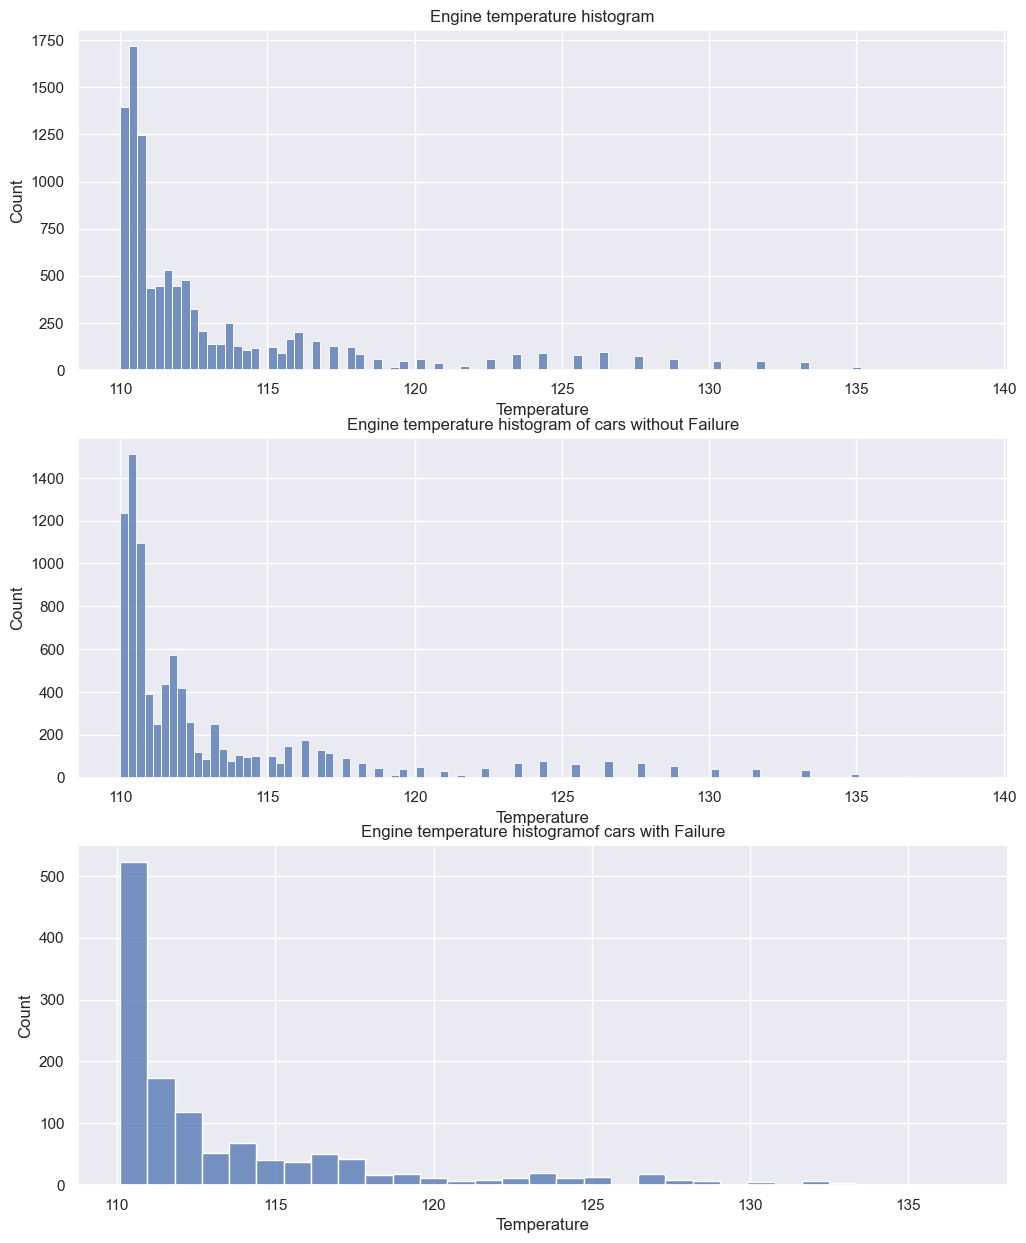

In [150]:
fig, axes = plt.subplots(3, 1, figsize=(12,15))

sns.histplot(x="Temperature", data=ds_fl, ax=axes[0])
axes[0].set_title("Engine temperature histogram")

sns.histplot(x="Temperature", data=ds_fl[ds_fl["No_Failure"] == 1], ax=axes[1])
axes[1].set_title("Engine temperature histogram of cars without Failure")

sns.histplot(x="Temperature", data=ds_fl[ds_fl["No_Failure"] == 0], ax=axes[2])
axes[2].set_title("Engine temperature histogramof cars with Failure")

Text(0.5, 0, 'Failure')

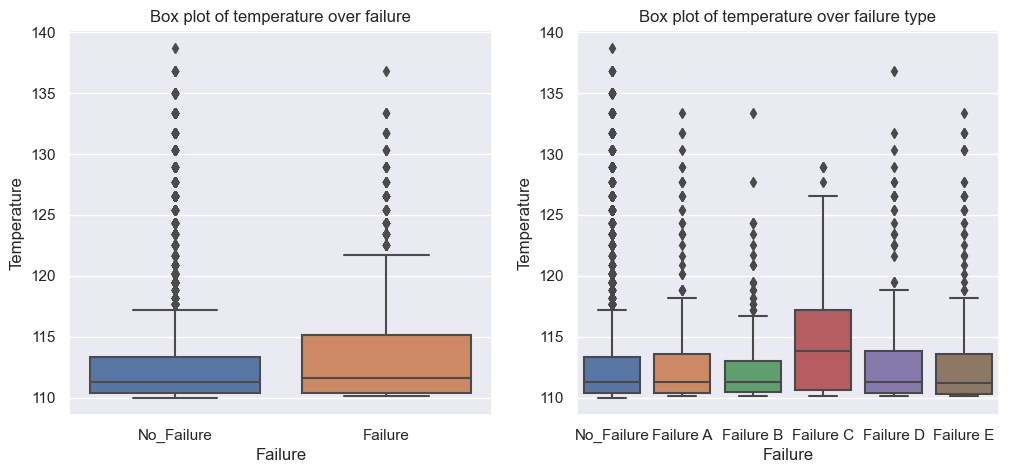

In [143]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.boxplot(x=ds_fl["No_Failure"].map({0:"Failure", 1:"No_Failure"}), y="Temperature", data=ds_fl, ax=axes[0])
axes[0].set_title("Box plot of temperature over failure")
axes[0].set_xlabel("Failure")

sns.boxplot(x="Failure_type", y="Temperature", data=ds_fl, ax=axes[1])
axes[1].set_title("Box plot of temperature over failure type")
axes[1].set_xlabel("Failure")

#### Conclusion:

##### The mean temperture of the engine is slightly higher with failure, but no so obvious. The 75% quartile of temperture is a few degree higher with failure. 

##### Failure C shows higher mean and 75 quartile temperature.

##### Overall, the ranges of temperature of cars with or without failure are not that different

#### \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*

#### 3.8 RPM

Text(0.5, 1.0, 'Engine RPM histogramof cars with Failure')

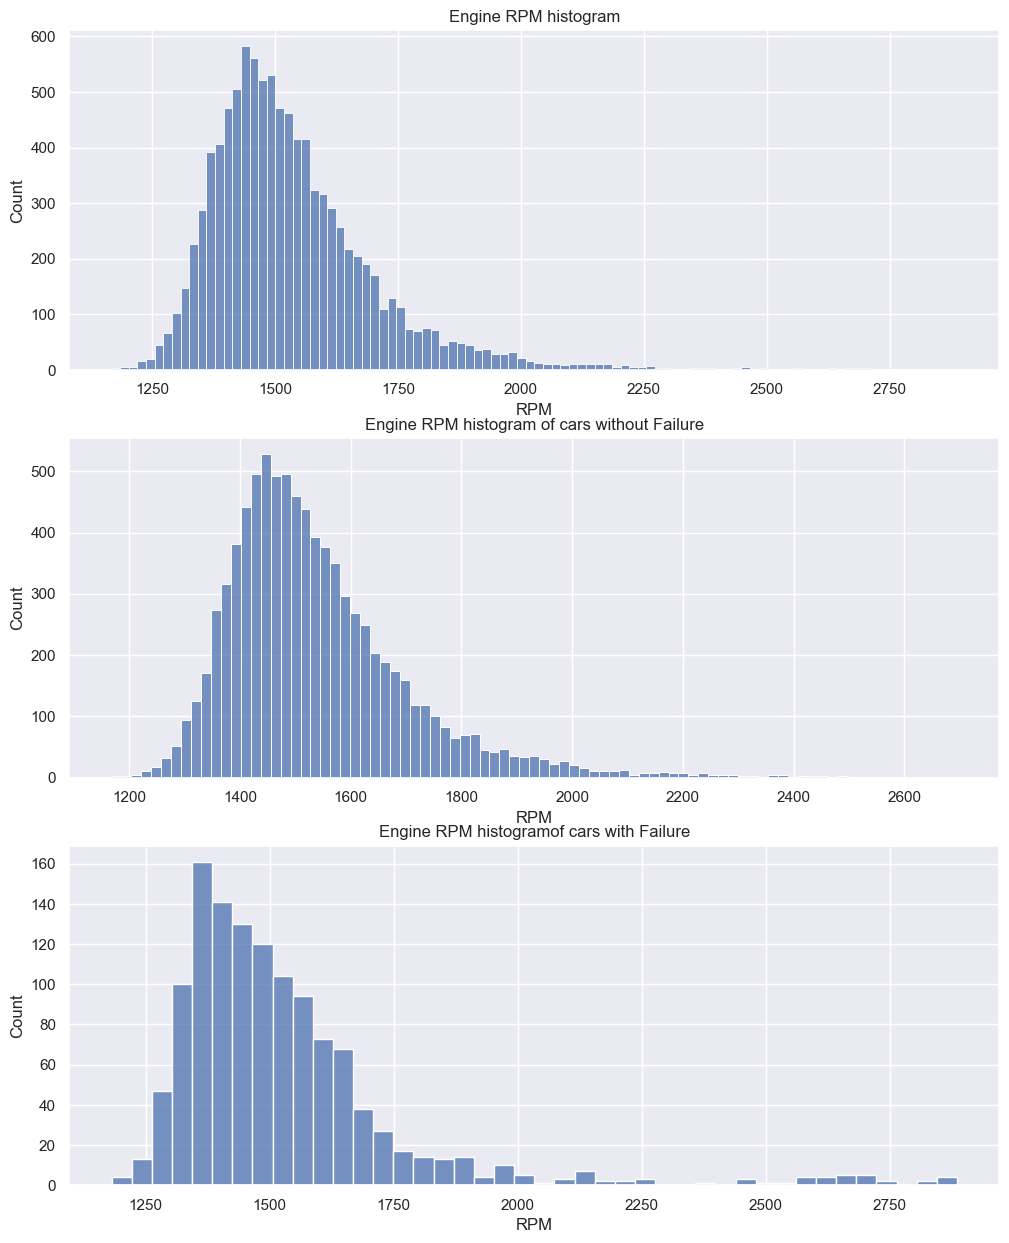

In [153]:
fig, axes = plt.subplots(3, 1, figsize=(12,15))

sns.histplot(x="RPM", data=ds_fl[ds_fl["RPM"] > 0], ax=axes[0])
axes[0].set_title("Engine RPM histogram")

sns.histplot(x="RPM", data=ds_fl[(ds_fl["RPM"] > 0) & (ds_fl["No_Failure"] == 1)], ax=axes[1])
axes[1].set_title("Engine RPM histogram of cars without Failure")

sns.histplot(x="RPM", data=ds_fl[(ds_fl["RPM"] > 0) & (ds_fl["No_Failure"] == 0)], ax=axes[2])
axes[2].set_title("Engine RPM histogramof cars with Failure")

Text(0.5, 0, 'Failure')

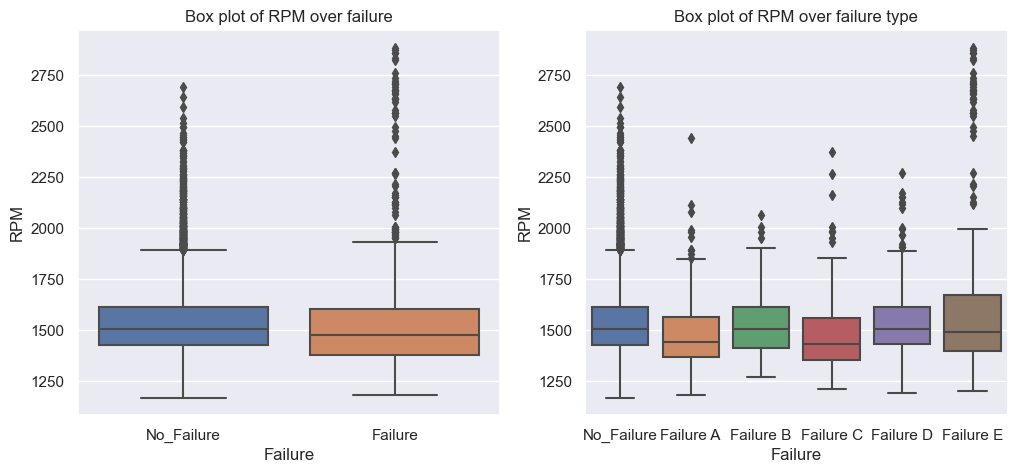

In [154]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.boxplot(x=ds_fl["No_Failure"].map({0:"Failure", 1:"No_Failure"}), y="RPM", data=ds_fl[ds_fl["RPM"] > 0], ax=axes[0])
axes[0].set_title("Box plot of RPM over failure")
axes[0].set_xlabel("Failure")

sns.boxplot(x="Failure_type", y="RPM", data=ds_fl[ds_fl["RPM"] > 0], ax=axes[1])
axes[1].set_title("Box plot of RPM over failure type")
axes[1].set_xlabel("Failure")

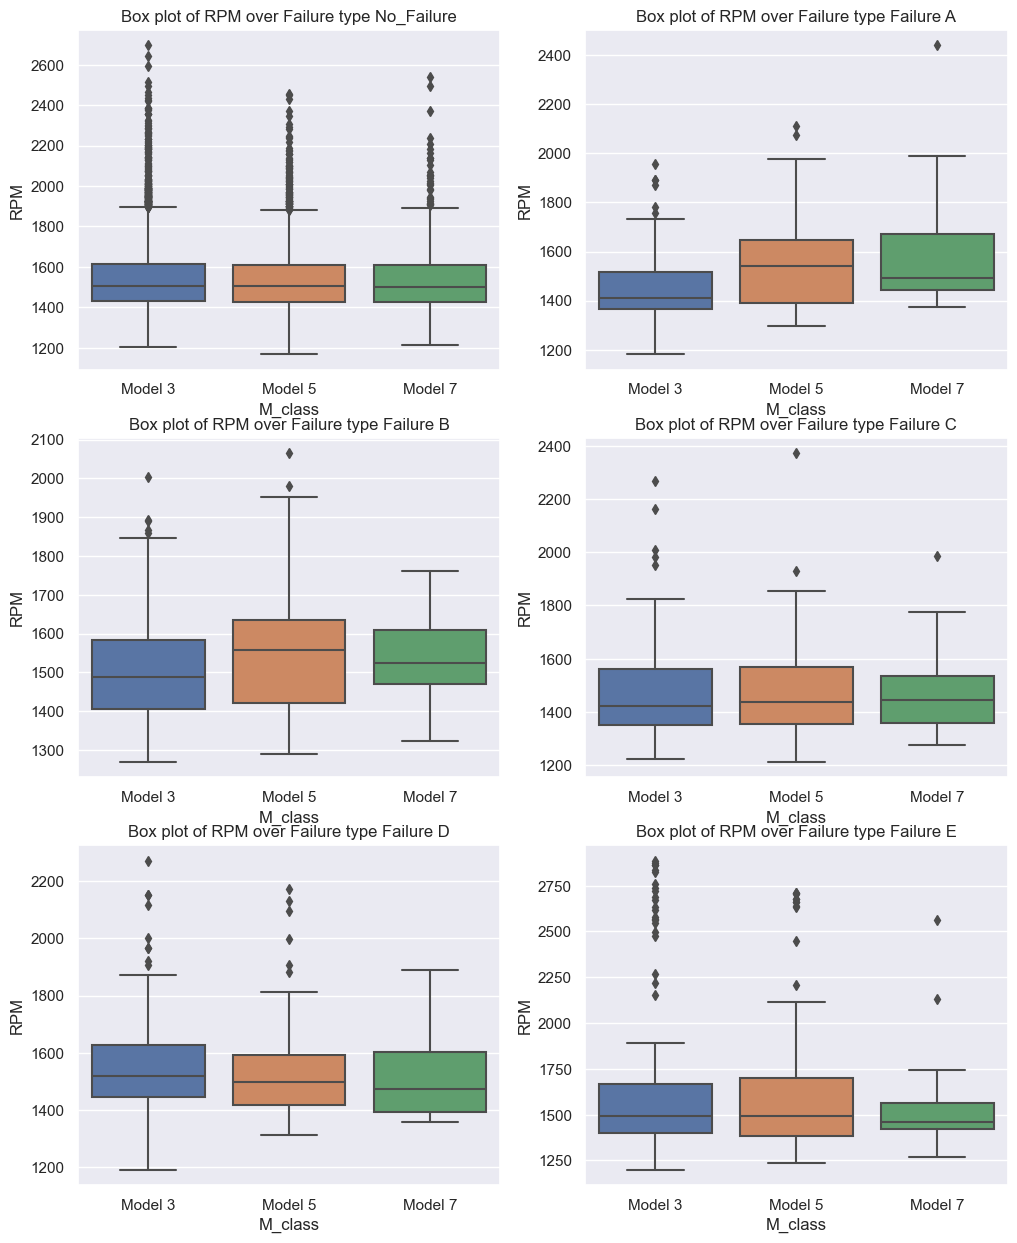

In [187]:
fig, axes = plt.subplots(3, 2, figsize=(12,15))

for ft, ax in zip(ds_fl["Failure_type"].cat.categories, axes.ravel()):
    sns.boxplot(x="M_class", y="RPM", data=ds_fl[(ds_fl["RPM"] > 0) & (ds_fl["Failure_type"] == ft)], ax=ax)
    ax.set_title(f"Box plot of RPM over Failure type {ft}")

In [188]:
ds_fl.loc[ds_fl["RPM"] < 0, "RPM"] = np.nan
ds_fl["RPM"] = ds_fl.groupby(["Failure_type", "M_class"], group_keys=True)["RPM"].\
                            transform(lambda x: x.fillna(round(x.median())))

<AxesSubplot: xlabel='RPM', ylabel='Temperature'>

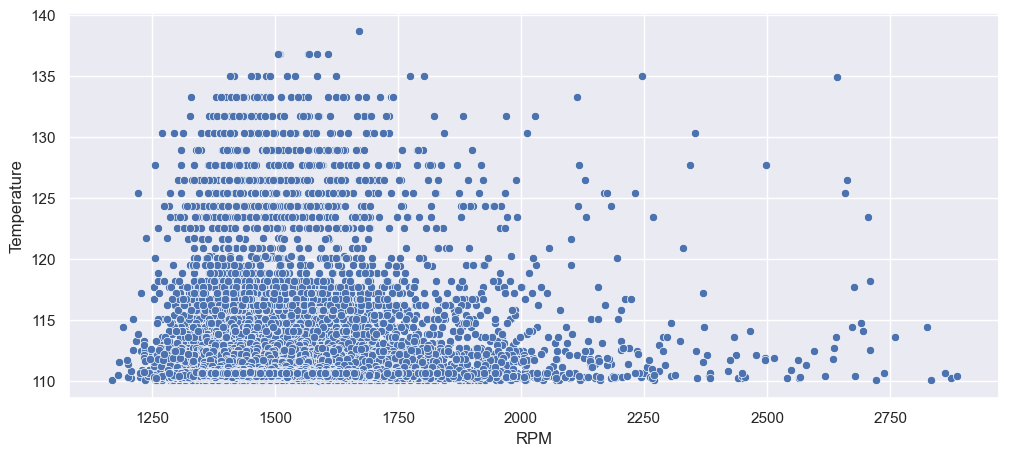

In [156]:
plt.figure(figsize=(12, 5))

sns.scatterplot(x="RPM", y="Temperature", data=ds_fl[(ds_fl["RPM"] > 0) & (ds_fl["Failure_Type"])])

#### Conclusion:

##### It seems that the RPM tends to be smaller when failure happens.

##### People might has a impression that the temperature should be high if the RPM is high. The scatter plot doesn't support that.

##### Overall, the ranges of RPM of cars with or without failure are not that different

#### \*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*

#### 3.9 Fuel consumption

Text(0.5, 1.0, 'Fuel consumption histogramof cars with Failure')

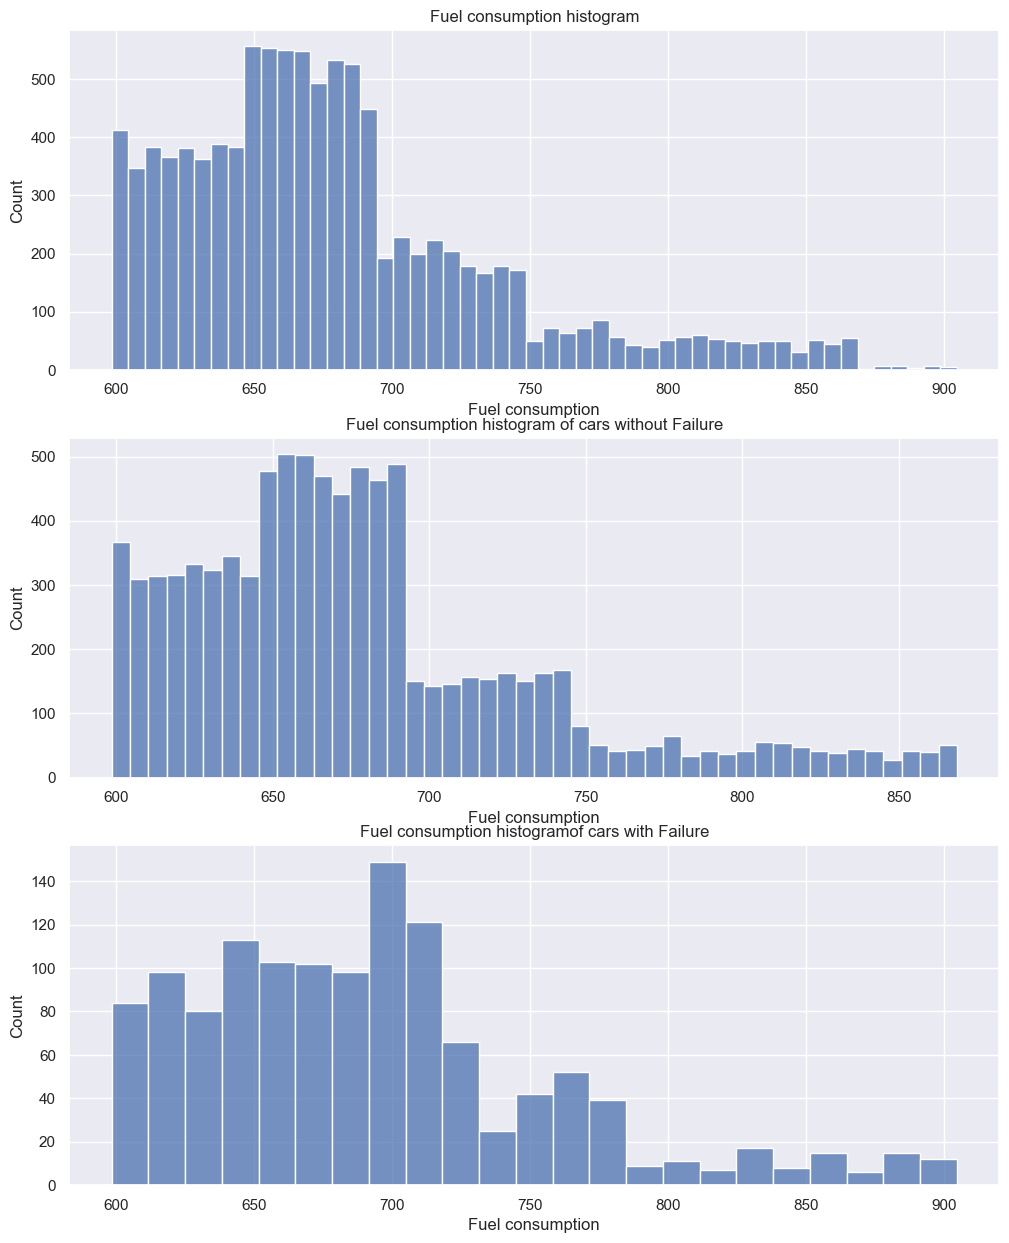

In [157]:
fig, axes = plt.subplots(3, 1, figsize=(12,15))

sns.histplot(x="Fuel consumption", data=ds_fl, ax=axes[0])
axes[0].set_title("Fuel consumption histogram")

sns.histplot(x="Fuel consumption", data=ds_fl[(ds_fl["No_Failure"] == 1)], ax=axes[1])
axes[1].set_title("Fuel consumption histogram of cars without Failure")

sns.histplot(x="Fuel consumption", data=ds_fl[ (ds_fl["No_Failure"] == 0)], ax=axes[2])
axes[2].set_title("Fuel consumption histogramof cars with Failure")

Text(0.5, 0, 'Failure')

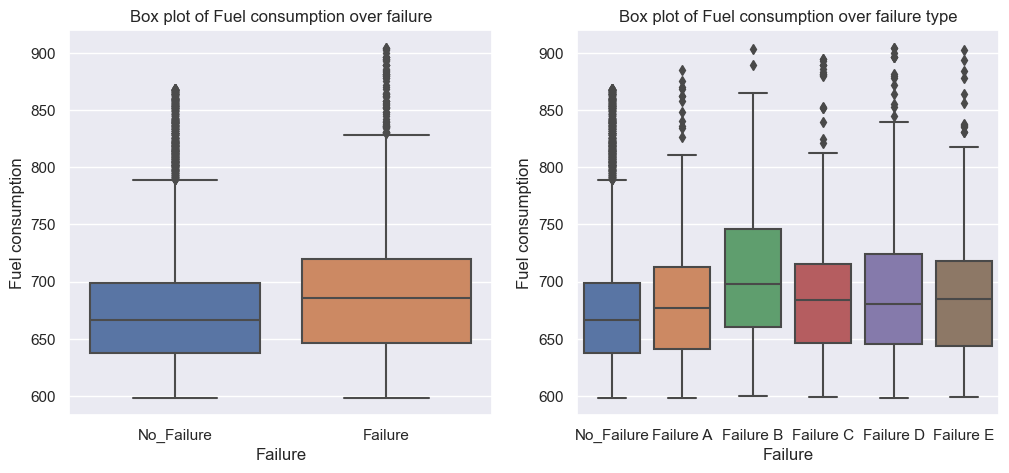

In [158]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.boxplot(x=ds_fl["No_Failure"].map({0:"Failure", 1:"No_Failure"}), y="Fuel consumption", data=ds_fl, ax=axes[0])
axes[0].set_title("Box plot of Fuel consumption over failure")
axes[0].set_xlabel("Failure")

sns.boxplot(x="Failure_type", y="Fuel consumption", data=ds_fl, ax=axes[1])
axes[1].set_title("Box plot of Fuel consumption over failure type")
axes[1].set_xlabel("Failure")

#### Naturally, people are interested if there is any correlation between RPM and Fuel consuption and Temperature and Fuel consuption. The scatter plot shows there is no clear correlation. 

<AxesSubplot: xlabel='RPM', ylabel='Fuel consumption'>

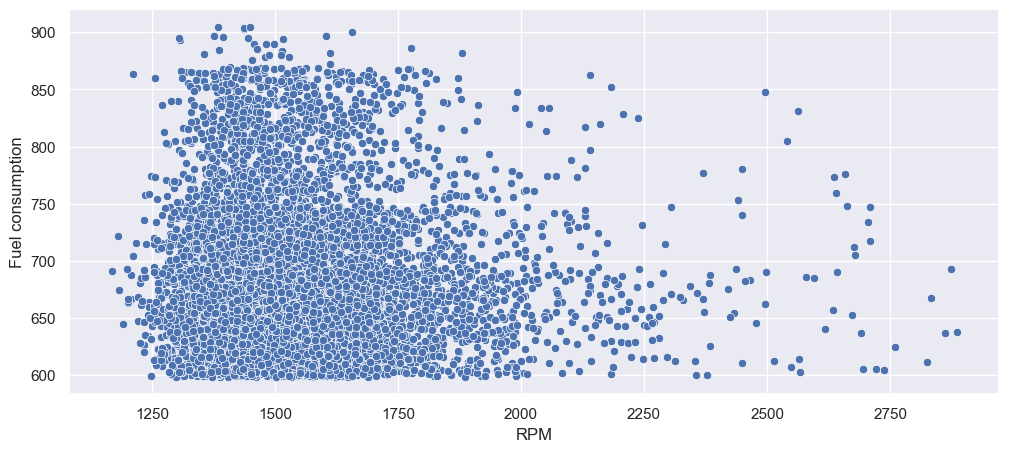

In [159]:
plt.figure(figsize=(12, 5))

sns.scatterplot(x="RPM", y="Fuel consumption", data=ds_fl[ds_fl["RPM"] > 0])

<AxesSubplot: xlabel='Temperature', ylabel='Fuel consumption'>

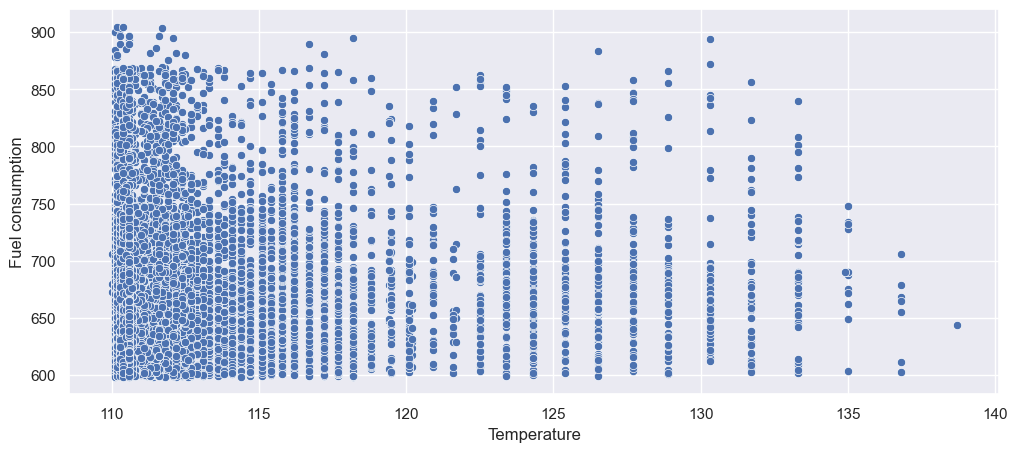

In [160]:
plt.figure(figsize=(12, 5))

sns.scatterplot(x="Temperature", y="Fuel consumption", data=ds_fl[ds_fl["RPM"] > 0])

#### Conclusion:

##### It seems that the Fuel consumption tends to be higher when failure happens. The 25%, 50% and 75% quartiles are all highers. 

##### However, the ranges of Fuel consumption of cars with or without failure are not that different